In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from datetime import datetime
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import RobustScaler
import xgboost as xgb


from google.colab import files

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Franki
df_item_price = pd.read_csv("/content/drive/MyDrive/TFM Nuclio DS/data_dsmarket/item_prices.csv")
df_item_sales = pd.read_csv('/content/drive/MyDrive/TFM Nuclio DS/data_dsmarket/item_sales.csv')
df_calendar = pd.read_csv('/content/drive/MyDrive/TFM Nuclio DS/data_dsmarket/daily_calendar_with_events.csv')

#Data understanding

##Dataset first aproach and size

In [ ]:
df_item_price.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6965706 entries, 0 to 6965705
Columns: 5 entries, item to sell_price
dtypes: float64(2), object(3)
memory usage: 265.7+ MB


In [ ]:
df_item_sales.info(verbose= False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30490 entries, 0 to 30489
Columns: 1920 entries, id to d_1913
dtypes: int64(1913), object(7)
memory usage: 446.6+ MB


In [ ]:
df_calendar.info(verbose= False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1913 entries, 0 to 1912
Columns: 5 entries, date to event
dtypes: int64(1), object(4)
memory usage: 74.9+ KB


In [ ]:
df_item_price.head().T

,0,1,2,3,4
item,ACCESORIES_1_001,ACCESORIES_1_001,ACCESORIES_1_001,ACCESORIES_1_001,ACCESORIES_1_001
category,ACCESORIES,ACCESORIES,ACCESORIES,ACCESORIES,ACCESORIES
store_code,NYC_1,NYC_1,NYC_1,NYC_1,NYC_1
yearweek,201328.0,201329.0,201330.0,201331.0,201332.0
sell_price,12.7414,12.7414,10.9858,10.9858,10.9858


In [ ]:
df_item_sales

,id,item,category,department,store,store_code,region,d_1,d_2,d_3,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,ACCESORIES_1_001_NYC_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,ACCESORIES_1_002_NYC_1,ACCESORIES_1_002,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,ACCESORIES_1_003_NYC_1,ACCESORIES_1_003,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,ACCESORIES_1_004_NYC_1,ACCESORIES_1_004,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,ACCESORIES_1_005_NYC_1,ACCESORIES_1_005,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,2,1,1,0,1,1,2,2,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30485,SUPERMARKET_3_823_PHI_3,SUPERMARKET_3_823,SUPERMARKET,SUPERMARKET_3,Queen_Village,PHI_3,Philadelphia,0,0,2,...,2,0,0,0,0,0,1,0,0,1
30486,SUPERMARKET_3_824_PHI_3,SUPERMARKET_3_824,SUPERMARKET,SUPERMARKET_3,Queen_Village,PHI_3,Philadelphia,0,0,0,...,0,0,0,0,0,0,0,0,1,0
30487,SUPERMARKET_3_825_PHI_3,SUPERMARKET_3_825,SUPERMARKET,SUPERMARKET_3,Queen_Village,PHI_3,Philadelphia,0,6,0,...,2,1,0,2,0,1,0,0,1,0
30488,SUPERMARKET_3_826_PHI_3,SUPERMARKET_3_826,SUPERMARKET,SUPERMARKET_3,Queen_Village,PHI_3,Philadelphia,0,0,0,...,0,0,1,0,0,1,0,3,1,3


In [ ]:
df_calendar

,date,weekday,weekday_int,d,event
0,2011-01-29,Saturday,1,d_1,NaN
1,2011-01-30,Sunday,2,d_2,NaN
2,2011-01-31,Monday,3,d_3,NaN
3,2011-02-01,Tuesday,4,d_4,NaN
4,2011-02-02,Wednesday,5,d_5,NaN
...,...,...,...,...,...
1908,2016-04-20,Wednesday,5,d_1909,NaN
1909,2016-04-21,Thursday,6,d_1910,NaN
1910,2016-04-22,Friday,7,d_1911,NaN
1911,2016-04-23,Saturday,1,d_1912,NaN


In [ ]:
items = df_item_sales['item'].unique()
items

array(['ACCESORIES_1_001', 'ACCESORIES_1_002', 'ACCESORIES_1_003', ...,
       'SUPERMARKET_3_825', 'SUPERMARKET_3_826', 'SUPERMARKET_3_827'],
      dtype=object)

In [ ]:
categorys = df_item_sales['category'].unique()
categorys

array(['ACCESORIES', 'HOME_&_GARDEN', 'SUPERMARKET'], dtype=object)

In [ ]:
stores = df_item_sales['store'].unique()
stores

array(['Greenwich_Village', 'Harlem', 'Tribeca', 'Brooklyn', 'South_End',
       'Roxbury', 'Back_Bay', 'Midtown_Village', 'Yorktown',
       'Queen_Village'], dtype=object)

In [ ]:
department = df_item_sales['department'].unique()
department

array(['ACCESORIES_1', 'ACCESORIES_2', 'HOME_&_GARDEN_1',
       'HOME_&_GARDEN_2', 'SUPERMARKET_1', 'SUPERMARKET_2',
       'SUPERMARKET_3'], dtype=object)

In [ ]:
regions = df_item_sales['region'].unique()
regions

array(['New York', 'Boston', 'Philadelphia'], dtype=object)

In [ ]:
day_columns = df_item_sales.select_dtypes(include=np.number).columns.tolist()
#day_columns

#Adjust calendar and seals

In [ ]:
#la idea es hacer un merge de el calendario con las ventas diarias hechas en cada tienda. 
#agrupar el dataset de seals por tienda y a esto juntarlo con el calendario y ahi poder hacer una linea temporal con la cantidad de ventas, 
#o incluso con este nuevo set poder agruparlo por semana mes año con un resample... 
#esto despues se puede hacer con las categorias o las agrupaciones que se quiera..
#distribucion de ventas en el año. De una categoria o producto, por tienda, por region o incluso en general y ver ese comportamiento.

In [ ]:
df_item_sales_1 = df_item_sales.copy()

In [ ]:
df_item_sales_1.set_index(['id', 'item', 'category', 'department', 'store', 'store_code', 'region'], inplace=True)

In [ ]:
date_strings = []
for i in df_item_sales_1.columns:
  date_strings.append(i)

In [ ]:
# Create a list of all date strings
date_strings 

# Extract the day number from each date string and create a new list of day numbers
day_numbers = [int(date_string.split('_')[1]) for date_string in date_strings]

# Create a Pandas datetime index using the day numbers
date_index = pd.date_range(start='2011-01-29', periods=len(day_numbers), freq='D')

# Assign the new datetime index to your DataFrame
df_item_sales_1.columns = date_index



In [ ]:
df_item_sales_1.reset_index(inplace=True)

In [ ]:
df_item_sales_1

,id,item,category,department,store,store_code,region,2011-01-29 00:00:00,2011-01-30 00:00:00,2011-01-31 00:00:00,...,2016-04-15 00:00:00,2016-04-16 00:00:00,2016-04-17 00:00:00,2016-04-18 00:00:00,2016-04-19 00:00:00,2016-04-20 00:00:00,2016-04-21 00:00:00,2016-04-22 00:00:00,2016-04-23 00:00:00,2016-04-24 00:00:00
0,ACCESORIES_1_001_NYC_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,ACCESORIES_1_002_NYC_1,ACCESORIES_1_002,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,ACCESORIES_1_003_NYC_1,ACCESORIES_1_003,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,ACCESORIES_1_004_NYC_1,ACCESORIES_1_004,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,ACCESORIES_1_005_NYC_1,ACCESORIES_1_005,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,2,1,1,0,1,1,2,2,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30485,SUPERMARKET_3_823_PHI_3,SUPERMARKET_3_823,SUPERMARKET,SUPERMARKET_3,Queen_Village,PHI_3,Philadelphia,0,0,2,...,2,0,0,0,0,0,1,0,0,1
30486,SUPERMARKET_3_824_PHI_3,SUPERMARKET_3_824,SUPERMARKET,SUPERMARKET_3,Queen_Village,PHI_3,Philadelphia,0,0,0,...,0,0,0,0,0,0,0,0,1,0
30487,SUPERMARKET_3_825_PHI_3,SUPERMARKET_3_825,SUPERMARKET,SUPERMARKET_3,Queen_Village,PHI_3,Philadelphia,0,6,0,...,2,1,0,2,0,1,0,0,1,0
30488,SUPERMARKET_3_826_PHI_3,SUPERMARKET_3_826,SUPERMARKET,SUPERMARKET_3,Queen_Village,PHI_3,Philadelphia,0,0,0,...,0,0,1,0,0,1,0,3,1,3


In [ ]:
melt = df_item_sales_1.iloc[: , 7:]
melt

,2011-01-29,2011-01-30,2011-01-31,2011-02-01,2011-02-02,2011-02-03,2011-02-04,2011-02-05,2011-02-06,2011-02-07,...,2016-04-15,2016-04-16,2016-04-17,2016-04-18,2016-04-19,2016-04-20,2016-04-21,2016-04-22,2016-04-23,2016-04-24
0,0,0,0,0,0,0,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,0,0,0,0,0,0,0,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,0,0,0,0,0,0,0,0,0,0,...,2,1,1,0,1,1,2,2,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30485,0,0,2,2,0,3,1,4,1,0,...,2,0,0,0,0,0,1,0,0,1
30486,0,0,0,0,0,5,0,1,1,3,...,0,0,0,0,0,0,0,0,1,0
30487,0,6,0,2,2,4,1,8,5,2,...,2,1,0,2,0,1,0,0,1,0
30488,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,3,1,3


In [ ]:
time_series = pd.melt(df_item_sales_1, id_vars = ['store', 'id', 'item', 'category', 'region'], value_vars = melt, var_name="day", value_name="value")

In [ ]:
time_series

,store,id,item,category,region,day,value
0,Greenwich_Village,ACCESORIES_1_001_NYC_1,ACCESORIES_1_001,ACCESORIES,New York,2011-01-29,0
1,Greenwich_Village,ACCESORIES_1_002_NYC_1,ACCESORIES_1_002,ACCESORIES,New York,2011-01-29,0
2,Greenwich_Village,ACCESORIES_1_003_NYC_1,ACCESORIES_1_003,ACCESORIES,New York,2011-01-29,0
3,Greenwich_Village,ACCESORIES_1_004_NYC_1,ACCESORIES_1_004,ACCESORIES,New York,2011-01-29,0
4,Greenwich_Village,ACCESORIES_1_005_NYC_1,ACCESORIES_1_005,ACCESORIES,New York,2011-01-29,0
...,...,...,...,...,...,...,...
58327365,Queen_Village,SUPERMARKET_3_823_PHI_3,SUPERMARKET_3_823,SUPERMARKET,Philadelphia,2016-04-24,1
58327366,Queen_Village,SUPERMARKET_3_824_PHI_3,SUPERMARKET_3_824,SUPERMARKET,Philadelphia,2016-04-24,0
58327367,Queen_Village,SUPERMARKET_3_825_PHI_3,SUPERMARKET_3_825,SUPERMARKET,Philadelphia,2016-04-24,0
58327368,Queen_Village,SUPERMARKET_3_826_PHI_3,SUPERMARKET_3_826,SUPERMARKET,Philadelphia,2016-04-24,3


In [ ]:
time_series.rename(columns= {'day' : 'date'}, inplace= True)

In [ ]:
#time_series.to_csv('df_melt.csv', index= False)
#files.download('df_melt.csv')

##Distribution of each category by region

In [ ]:
time_serie_a = pd.DataFrame(time_series.set_index('date').groupby(['id']).resample('M').sum().reset_index())
time_serie_a

In [ ]:
time_serie_a = time_series.set_index('date').groupby(['category','region'])

<ipython-input-167-a7b6befdd85c>:9: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  resultado = tsv.sum(axis=1)
<ipython-input-167-a7b6befdd85c>:9: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  resultado = tsv.sum(axis=1)
<ipython-input-167-a7b6befdd85c>:9: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  resultado = tsv.sum(axis=1)


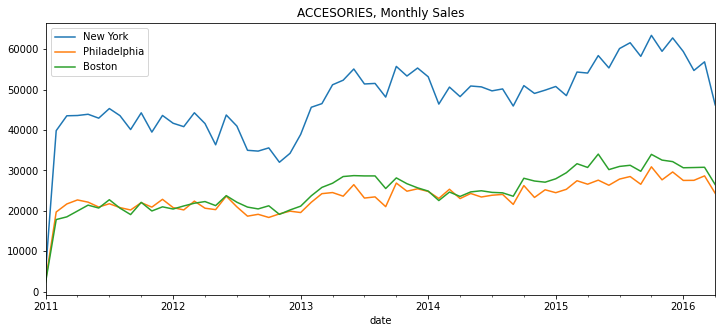

In [ ]:
time_serie_a.get_group(("ACCESORIES", "Boston")).groupby('date')['value'].sum().plot(figsize = (12, 5), title = "Weekly Sales");
time_serie_a.get_group(("ACCESORIES", "Philadelphia")).groupby('date')['value'].sum().plot(figsize = (12, 5), title = "Weekly Sales");
time_serie_a.get_group(("ACCESORIES", "New York")).groupby('date')['value'].sum().plot(figsize = (12, 5), title = "Weekly Sales");
plt.legend()

<ipython-input-169-fb05d502ea86>:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  resultado = tsv.sum(axis=1)
<ipython-input-169-fb05d502ea86>:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  resultado = tsv.sum(axis=1)
<ipython-input-169-fb05d502ea86>:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  resultado = tsv.sum(axis=1)


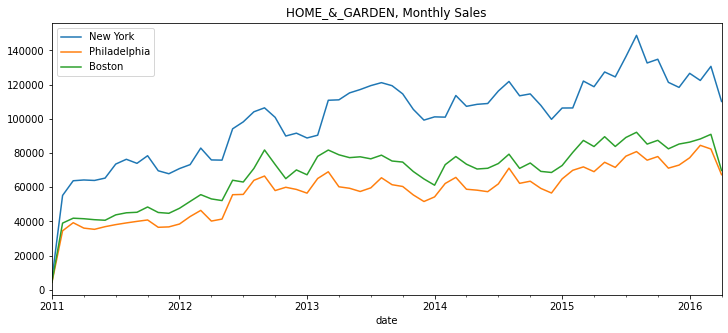

In [ ]:
time_serie_a.get_group(("HOME_&_GARDEN", "Boston")).groupby('date')['value'].sum().plot(figsize = (12, 5), title = "Weekly Sales");
time_serie_a.get_group(("HOME_&_GARDEN", "Philadelphia")).groupby('date')['value'].sum().plot(figsize = (12, 5), title = "Weekly Sales");
time_serie_a.get_group(("HOME_&_GARDEN", "New York")).groupby('date')['value'].sum().plot(figsize = (12, 5), title = "Weekly Sales");
plt.legend()v

<ipython-input-170-3c4145353b7c>:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  resultado = tsv.sum(axis=1)
<ipython-input-170-3c4145353b7c>:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  resultado = tsv.sum(axis=1)
<ipython-input-170-3c4145353b7c>:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  resultado = tsv.sum(axis=1)


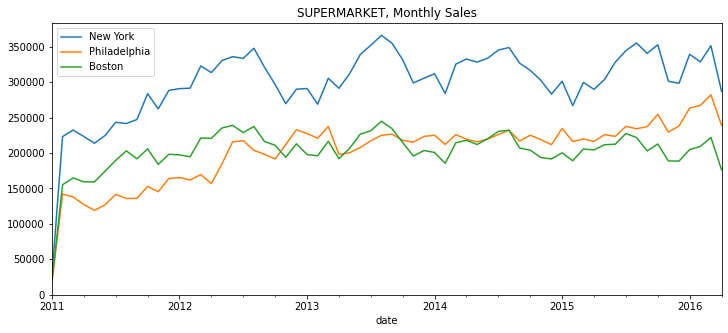

In [ ]:
time_serie_a.get_group(("SUPERMARKET", "Boston")).groupby('date')['value'].sum().plot(figsize = (12, 5), title = "Weekly Sales");
time_serie_a.get_group(("SUPERMARKET", "Philadelphia")).groupby('date')['value'].sum().plot(figsize = (12, 5), title = "Weekly Sales");
time_serie_a.get_group(("SUPERMARKET", "New York")).groupby('date')['value'].sum().plot(figsize = (12, 5), title = "Weekly Sales");
plt.legend()

#Distribucion geografica de ventas 

Show the distribution of seals per region, per stores and per category

In [ ]:
total_seals_per_region_per_category = time_serie_a.sum()

In [ ]:
total_seals_per_region_per_category  #EXCELENTE !!!!!!

In [ ]:
total_seals_per_region_per_category.describe()

# Clustering

## Items

###Dataset items

In [ ]:
mean_ventas_p_item_p_tienda = time_series.set_index('date').groupby(['item','store']).mean()

In [ ]:
mean_ventas_p_item_p_tienda.rename(columns = {0: 'item'}, inplace=True)
mean_ventas_p_item_p_tienda  

In [ ]:
mean_ventas_p_item_p_region = time_series('item', 'region').mean()
mean_ventas_p_item_p_region.rename(columns = {0: 'item'}, inplace=True)

In [ ]:
mean_ventas_p_item_p_tienda = mean_ventas_p_item_p_tienda.merge(mean_ventas_p_item_p_region, how='left', on= ['item'])

In [ ]:
calendar_total_ventas_por_dia_por_item = df_calendar.set_index('d')

for i in items:
  time_serie = calendario_de_ventas_por_atributo(df_item_sales, 'item', i)
  tsv = time_serie.drop('weekday_int', axis=1) #para que el sum no sume el numenro del dia de la semana.
  resultado = tsv.sum(axis=1)

  calendar_total_ventas_por_dia_por_item[i] = resultado

In [ ]:
def weekday_media(df):   #df tiene que tener la columna 'weekday'

  weekday_mean= df.groupby('weekday').mean().sort_values('weekday_int').T
  weekday_mean.drop('weekday_int', inplace=True)
  weekday_mean.reset_index(inplace=True)
  weekday_mean.sort_values(by=['index'], inplace=True)
  weekday_mean.rename(columns={'Saturday':'Saturday_seals_mean', 'Sunday':'Sunday_seals_mean',
                             'Monday':'Monday_seals_mean', 'Tuesday':'Tuesday_seals_mean',
                             'Wednesday':'Wednesday_seals_mean', 'Thursday':'Thursday_seals_mean',
                             'Friday':'Friday_seals_mean'}, inplace=True)
  return weekday_mean

In [ ]:
weekday_mean = weekday_media(calendar_total_ventas_por_dia_por_item)
weekday_mean.rename(columns={'index':'item'}, inplace=True)

In [ ]:
weekday_mean

In [ ]:
weekday_mean.columns.tolist()

In [ ]:
weekday_mean['weekend_seals_mean'] = pd.DataFrame((weekday_mean['Saturday_seals_mean'] + weekday_mean['Sunday_seals_mean'])/2)
weekday_mean['weekdays_seals_mean'] = pd.DataFrame((weekday_mean['Monday_seals_mean'] + weekday_mean['Tuesday_seals_mean'] 
                              + weekday_mean['Wednesday_seals_mean'] + weekday_mean['Thursday_seals_mean']
                              + weekday_mean['Friday_seals_mean'])/5)

weekday_seals_means = weekday_mean

weekday_seals_means.drop(['Saturday_seals_mean',
                          'Sunday_seals_mean',
                          'Monday_seals_mean',
                          'Tuesday_seals_mean',
                          'Wednesday_seals_mean',
                          'Thursday_seals_mean',
                          'Friday_seals_mean'],
                          axis=1,
                          inplace=True)

#Aca hago, como nos dijo Matias, la divicion de las ventas por dia de semana y fin de semana para reducir variables y mejorar la explicabilidad

In [ ]:
weekday_seals_means

In [ ]:
Items_clustering = mean_ventas_p_item_p_tienda.merge(weekday_seals_means,
                                  how='left',
                                  on='item')

In [ ]:
def month_mean (df):  #df tiene que tener la columna 'date'

  df['date'] = pd.to_datetime(df['date'])
  ca = df.set_index("date").resample("M").mean()
  gca = ca.groupby(ca.index.month)
  month_mean = gca.mean() #hago el promedio de de las ventas de cada mes por tienda. es el promedio del promedio, 
                          #primero promedio las ventas de cada mes de los 6 años y despues promendio cada mes por su cuenta, enero, febrero...
  return month_mean

In [ ]:
month_mean = month_mean(calendar_total_ventas_por_dia_por_item)

In [ ]:
month_mean_p_item = month_mean
month_mean_p_item.drop('weekday_int', axis=1, inplace=True)
month_mean_p_item = month_mean_p_item.T
month_mean_p_item.reset_index(inplace=True)
month_mean_p_item.sort_values('index', inplace=True)
month_mean_p_item.rename(columns={'index':'item', 1:'jen_mean', 2:'feb_mean', 3:'march_mean', 4:'apr_mean', 5:'may_mean', 6:'jun_mean',
                                   7:'jul_mean', 8:'agu_mean', 9:'sep_mean', 10:'oct_mean', 11:'nov_man', 12:'dic_mean'}, inplace=True)

month_mean_p_item

In [ ]:
month_mean_p_item['spring_month_mean'] = pd.DataFrame((month_mean_p_item['march_mean'] + 
                                                       month_mean_p_item['apr_mean'] + 
                                                       month_mean_p_item['may_mean'])/3)
month_mean_p_item['summer_month_mean'] = pd.DataFrame((month_mean_p_item['jun_mean'] + 
                                                       month_mean_p_item['jul_mean'] + 
                                                       month_mean_p_item['agu_mean'])/3)
month_mean_p_item['autumn_month_mean'] = pd.DataFrame((month_mean_p_item['sep_mean'] + 
                                                       month_mean_p_item['oct_mean'] +
                                                       month_mean_p_item['nov_man'])/3)
month_mean_p_item['winter_month_mean'] = pd.DataFrame((month_mean_p_item['dic_mean'] + 
                                                       month_mean_p_item['jen_mean'] + 
                                                       month_mean_p_item['feb_mean'])/3)                                                                                                                                                                     
                                          

season_mean_p_item = month_mean_p_item

season_mean_p_item.drop([ 'jen_mean',
                          'feb_mean',
                          'march_mean',
                          'apr_mean',
                          'may_mean',
                          'jun_mean',
                          'jul_mean',
                          'agu_mean',
                          'sep_mean',
                          'oct_mean',
                          'nov_man',
                          'dic_mean'],
                          axis=1,
                          inplace=True)

In [ ]:
Items_clustering = Items_clustering.merge(season_mean_p_item,
                                  how='left',
                                  on='item')

In [ ]:
sell_price = df_item_price.groupby('item').mean()
sell_price.drop('yearweek', axis=1, inplace=True)

In [ ]:
Items_clustering = Items_clustering.merge(sell_price,
                                  how='left',
                                  on='item')

In [ ]:
items_categorys = pd.DataFrame(df_item_sales.groupby('item').max()['category'])
items_categorys.reset_index(inplace=True)

Items_clustering = Items_clustering.merge(items_categorys,
                                  how='left',
                                  on='item')         

#La variable categoria se puede utilizar para desglosar el data set y hacer clusters para cada categoria

In [ ]:
Items_clustering_1 = Items_clustering.copy()

In [ ]:
dummy_dataset = pd.get_dummies(Items_clustering['category'], prefix = 'category')

In [ ]:
dummy_dataset

In [ ]:
#Items_clustering.select_dtypes(include=np.number)
scaler = StandardScaler().fit_transform(Items_clustering.select_dtypes(include=np.number)) 

Items_clustering_S = pd.DataFrame(
    data = scaler, 
    index = Items_clustering.select_dtypes(include=np.number).index,
    columns = Items_clustering.select_dtypes(include=np.number).columns
)

In [ ]:
Items_clustering = pd.concat([Items_clustering['item'], Items_clustering_S], axis = 1)
Items_clustering = pd.concat([Items_clustering, dummy_dataset], axis = 1)

In [ ]:
Items_clustering.T

###Modelo Items

In [ ]:
#Items_clustering_1
r = pd.DataFrame(Items_clustering_1['item'])

#### cluster_category_ACCESORIES

In [ ]:
cluster_category_ACCESORIES = Items_clustering.groupby('category_ACCESORIES').get_group(1)

In [ ]:
Items_clustering_for_fit = cluster_category_ACCESORIES.drop('item', axis=1)

In [ ]:
def minmaxTransformacion(df, columna):
    scaler=MinMaxScaler()
    df[columna]=scaler.fit_transform(df[columna].values.reshape(-1,1))
    return scaler

In [ ]:
lista = Items_clustering_for_fit.columns.tolist()
for i in lista:
   minmaxTransformacion(Items_clustering_for_fit, i)

In [ ]:
wcss = []

for i in range(1,10):
  kmeans = KMeans(n_clusters=i, max_iter=200)
  kmeans.fit(Items_clustering_for_fit)
  wcss.append(kmeans.inertia_)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

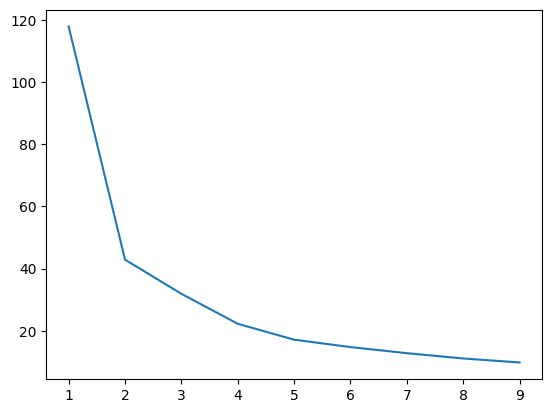

In [ ]:
plt.plot (range(1,10), wcss)

In [ ]:
kmeans = KMeans(n_clusters=2)#, random_state=0, n_init="auto").fit(Stores_clustering_for_fit)

In [ ]:
y_predicted = kmeans.fit_predict(Items_clustering_for_fit)
y_predicted

In [ ]:
cluster_category_ACCESORIES['cluster_ACCESORIES'] = y_predicted
cluster_category_ACCESORIES['cluster_ACCESORIES'].value_counts()
#Items_clustering[['items', 'cluster']]

<ipython-input-268-7079aed141f6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_category_ACCESORIES['cluster_ACCESORIES'] = y_predicted


0    523
1     42
Name: cluster_ACCESORIES, dtype: int64

In [ ]:
# revisar depenndiendo de las metricas de los grupos #MATI

In [ ]:
cluster_category_ACCESORIES[cluster_category_ACCESORIES['cluster_ACCESORIES']==1].describe().T

,count,mean,std,min,25%,50%,75%,max
New York,42.0,1.359547,0.712293,0.035077,0.923315,1.288408,1.847558,3.082445
Boston,42.0,0.434158,0.319605,-0.044245,0.198013,0.366160,0.685956,1.265268
Philadelphia,42.0,0.743732,0.463977,-0.086959,0.454433,0.700525,1.113702,1.862071
weekend_seals_mean,42.0,0.853094,0.449388,0.295735,0.527364,0.740961,1.120966,2.186247
weekdays_seals_mean,42.0,0.986453,0.500307,0.263442,0.576080,0.886126,1.316436,2.333095
spring_month_mean,42.0,1.057747,0.557029,0.291296,0.662059,1.008529,1.414491,2.528635
summer_month_mean,42.0,0.868288,0.484383,0.204281,0.476018,0.739284,1.154956,2.203706
autumn_month_mean,42.0,0.802101,0.403643,0.209824,0.496208,0.751546,1.029227,1.954407
winter_month_mean,42.0,1.010740,0.490480,0.326767,0.638738,0.957700,1.388705,2.395313
sell_price,42.0,-0.883565,0.522701,-1.139641,-1.087556,-1.063096,-1.019381,1.718291


###

In [ ]:
cluster_category_ACCESORIES.groupby('cluster_ACCESORIES').mean().T #[Items_clustering['cluster']==0].describe().T

cluster_ACCESORIES,0,1
New York,-0.341273,1.359547
Boston,-0.261329,0.434158
Philadelphia,-0.350071,0.743732
weekend_seals_mean,-0.332552,0.853094
weekdays_seals_mean,-0.338925,0.986453
spring_month_mean,-0.349799,1.057747
summer_month_mean,-0.320859,0.868288
autumn_month_mean,-0.317150,0.802101
winter_month_mean,-0.339140,1.010740
sell_price,0.504491,-0.883565


####cluster_category_HOME_&_GARDEN	

In [ ]:
cluster_category_HOME_GARDEN = Items_clustering.groupby('category_HOME_&_GARDEN').get_group(1)

In [ ]:
Items_clustering_for_fit = cluster_category_HOME_GARDEN.drop('item', axis=1)

In [ ]:
def minmaxTransformacion(df, columna):
    scaler=MinMaxScaler()
    df[columna]=scaler.fit_transform(df[columna].values.reshape(-1,1))
    return scaler

In [ ]:
lista = Items_clustering_for_fit.columns.tolist()
for i in lista:
   minmaxTransformacion(Items_clustering_for_fit, i)

In [ ]:
wcss = []

for i in range(1,10):
  kmeans = KMeans(n_clusters=i, max_iter=200)
  kmeans.fit(Items_clustering_for_fit)
  wcss.append(kmeans.inertia_)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

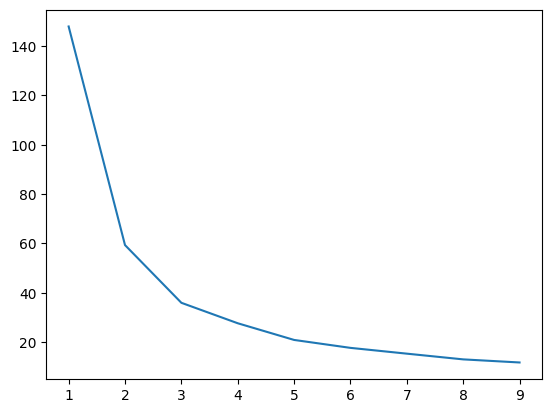

In [ ]:
plt.plot (range(1,10), wcss)

In [ ]:
kmeans = KMeans(n_clusters=2)#, random_state=0, n_init="auto").fit(Stores_clustering_for_fit)

In [ ]:
y_predicted = kmeans.fit_predict(Items_clustering_for_fit)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
cluster_category_HOME_GARDEN['cluster_HOME_GARDEN'] = y_predicted
cluster_category_HOME_GARDEN['cluster_HOME_GARDEN'].value_counts()
#Items_clustering[['items', 'cluster']]

<ipython-input-315-fcc4a271f761>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_category_HOME_GARDEN['cluster_HOME_GARDEN'] = y_predicted


0    994
1     53
Name: cluster_HOME_GARDEN, dtype: int64

In [ ]:
# revisar depenndiendo de las metricas de los grupos #MATI

In [ ]:
cluster_category_HOME_GARDEN[cluster_category_HOME_GARDEN['cluster_HOME_GARDEN']==1].describe().T

,count,mean,std,min,25%,50%,75%,max
New York,53.0,1.409823,0.732844,0.259495,0.790166,1.219678,1.951493,3.204583
Boston,53.0,1.433618,0.801150,0.107637,0.850553,1.231840,1.971221,3.452463
Philadelphia,53.0,1.397767,0.970318,-0.228850,0.655955,1.195516,2.155785,4.122887
weekend_seals_mean,53.0,1.509717,0.759747,0.594484,0.855174,1.222959,2.080374,3.318905
weekdays_seals_mean,53.0,1.504607,0.767429,0.647930,0.858976,1.174866,2.069105,3.428814
spring_month_mean,53.0,1.556794,0.841314,0.465228,0.859275,1.360518,2.087031,3.570701
summer_month_mean,53.0,1.429063,0.783531,0.178348,0.766515,1.182815,1.984520,3.558360
autumn_month_mean,53.0,1.492873,0.750940,0.456443,0.890439,1.280245,2.076016,3.379274
winter_month_mean,53.0,1.417591,0.683635,0.312885,0.866871,1.293581,1.930674,3.106646
sell_price,53.0,-0.591650,0.551447,-0.972448,-0.959858,-0.957923,-0.336766,1.514860


####cluster_category_SUPERMARKET

In [ ]:
cluster_category_SUPERMARKET = Items_clustering.groupby('category_SUPERMARKET').get_group(1)

In [ ]:
Items_clustering_for_fit = cluster_category_SUPERMARKET.drop('item', axis=1)

In [ ]:
def minmaxTransformacion(df, columna):
    scaler=MinMaxScaler()
    df[columna]=scaler.fit_transform(df[columna].values.reshape(-1,1))
    return scaler

In [ ]:
lista = Items_clustering_for_fit.columns.tolist()
for i in lista:
   minmaxTransformacion(Items_clustering_for_fit, i)

In [ ]:
wcss = []

for i in range(1,10):
  kmeans = KMeans(n_clusters=i, max_iter=200)
  kmeans.fit(Items_clustering_for_fit)
  wcss.append(kmeans.inertia_)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

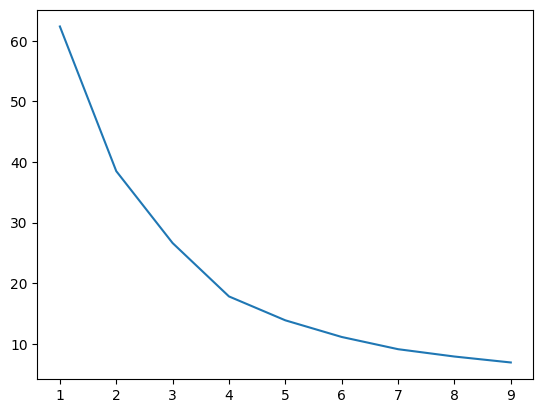

In [ ]:
plt.plot (range(1,10), wcss)

In [ ]:
kmeans = KMeans(n_clusters=2)#, random_state=0, n_init="auto").fit(Stores_clustering_for_fit)

In [ ]:
y_predicted = kmeans.fit_predict(Items_clustering_for_fit)
y_predicted

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [ ]:
cluster_category_SUPERMARKET['cluster_SUPERMARKET'] = y_predicted
cluster_category_SUPERMARKET['cluster_SUPERMARKET'].value_counts()
#Items_clustering[['items', 'cluster']]

<ipython-input-291-47a4d9db9e32>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_category_SUPERMARKET['cluster_SUPERMARKET'] = y_predicted


0    1370
1      67
Name: cluster_SUPERMARKET, dtype: int64

In [ ]:
# revisar depenndiendo de las metricas de los grupos #MATI

In [ ]:
cluster_category_SUPERMARKET[cluster_category_SUPERMARKET['cluster_SUPERMARKET']==1].describe().T

,count,mean,std,min,25%,50%,75%,max
New York,67.0,4.436197,3.690074,1.030973,2.331306,3.503363,4.946974,25.448992
Boston,67.0,4.261713,4.437401,0.812225,2.039689,2.912781,4.119499,27.859342
Philadelphia,67.0,4.755286,3.256265,1.047845,3.091265,3.840895,5.515220,19.638686
weekend_seals_mean,67.0,4.711794,3.653486,2.019323,2.760755,3.610635,5.248636,23.087620
weekdays_seals_mean,67.0,4.768063,3.478149,2.349131,2.815192,3.710788,5.436948,21.653358
spring_month_mean,67.0,4.757333,3.334867,2.119377,2.855950,3.627279,5.535702,19.976957
summer_month_mean,67.0,4.791221,3.575428,1.912367,2.666727,3.517251,5.275448,20.643117
autumn_month_mean,67.0,4.529816,3.952510,1.733891,2.659186,3.236315,4.882455,27.378042
winter_month_mean,67.0,4.672155,3.602193,1.642325,2.864978,3.549729,4.743175,23.552073
sell_price,67.0,-0.825830,0.252729,-1.173877,-0.968964,-0.863664,-0.731117,0.089425


In [ ]:
cluster_category_SUPERMARKET['cluster_SUPERMARKET'].replace([0,1],['Supermarket_0','Supermarket_1'], inplace=True)
cluster_category_ACCESORIES['cluster_ACCESORIES'].replace([0,1],['Accesories_0','Accesories_1'], inplace=True)
cluster_category_HOME_GARDEN['cluster_HOME_GARDEN'].replace([0,1],['Home_Garden_0','Home_Garden_1'], inplace=True)

g= pd.concat([ cluster_category_ACCESORIES['cluster_ACCESORIES'], cluster_category_HOME_GARDEN['cluster_HOME_GARDEN'], cluster_category_SUPERMARKET['cluster_SUPERMARKET']], axis=0)
g = pd.DataFrame(g)
g.rename(columns={0:'cluster'}, inplace=True)

<ipython-input-294-fc74f0b2781a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_category_SUPERMARKET['cluster_SUPERMARKET'].replace([0,1],['Supermarket_0','Supermarket_1'], inplace=True)
<ipython-input-294-fc74f0b2781a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_category_ACCESORIES['cluster_ACCESORIES'].replace([0,1],['Accesories_0','Accesories_1'], inplace=True)
<ipython-input-294-fc74f0b2781a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#

In [ ]:
r= Items_clustering_1[['item', 'category']]

In [ ]:
s = Items_clustering_1.select_dtypes(include=np.number).round()/10

In [ ]:
f = pd.concat([r,g,s], axis=1)

In [ ]:
f.to_csv('df_clusters_items_final.csv', index= False)
files.download('df_clusters_items_final.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
f[f['cluster']=='House_Garden_0'].describe().T

,count,mean,std,min,25%,50%,75%,max
Greenwich_Village,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Harlem,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Tribeca,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Brooklyn,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
South_End,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Roxbury,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Back_Bay,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Midtown_Village,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Yorktown,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Queen_Village,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##Stores

###Dataset Stores

In [2]:
time_series_b = time_series.set_index('date').groupby(['store','category'])

In [ ]:
Stores_clustering = time_series_b.mean() #El estudio de clusters para las tiendas lo hacemos con los datos promedio de todo el periodo en estudio 

In [ ]:
Stores_clustering.rename(columns={'ACCESORIES':'ACCESORIES_mean', 'HOME_&_GARDEN':'HOME_&_GARDEN_mean', 'SUPERMARKET':'SUPERMARKET_mean'}, inplace=True)

In [ ]:
df_item_sales.groupby('store')['region'].unique() 

In [ ]:
Stores_clustering.sort_values(by=0, inplace=True)
Stores_clustering['region']=df_item_sales.groupby('store')['region'].unique().tolist() 

In [ ]:
Stores_clustering.rename(columns={0:'tiendas'}, inplace=True)
Stores_clustering.set_index('tiendas', inplace=True)
Stores_clustering

In [ ]:
weekday_mean = calendar_total_ventas_por_dia_por_tienda.groupby('weekday').mean().sort_values('weekday_int').T
weekday_mean.drop('weekday_int', inplace=True)
weekday_mean.reset_index(inplace=True)
weekday_mean.sort_values(by=['index'], inplace=True)
weekday_mean.rename(columns={'index':'tiendas', 'Saturday':'Saturday_seals_mean', 'Sunday':'Sunday_seals_mean',
                             'Monday':'Monday_seals_mean', 'Tuesday':'Tuesday_seals_mean',
                             'Wednesday':'Wednesday_seals_mean', 'Thursday':'Thursday_seals_mean',
                             'Friday':'Friday_seals_mean'}, inplace=True)
weekday_mean

In [ ]:
weekday_mean['weekend_seals_mean'] = pd.DataFrame((weekday_mean['Saturday_seals_mean'] + weekday_mean['Sunday_seals_mean'])/2)
weekday_mean['weekdays_seals_mean'] = pd.DataFrame((weekday_mean['Monday_seals_mean'] + weekday_mean['Tuesday_seals_mean'] 
                              + weekday_mean['Wednesday_seals_mean'] + weekday_mean['Thursday_seals_mean']
                              + weekday_mean['Friday_seals_mean'])/5)

weekday_seals_means = weekday_mean

weekday_seals_means.drop(['Saturday_seals_mean',
                          'Sunday_seals_mean',
                          'Monday_seals_mean',
                          'Tuesday_seals_mean',
                          'Wednesday_seals_mean',
                          'Thursday_seals_mean',
                          'Friday_seals_mean'],
                          axis=1,
                          inplace=True)

In [ ]:
Stores_clustering = Stores_clustering.merge(
                            weekday_seals_means,
                            how = "left",
                            on = "tiendas"
                            )
Stores_clustering

In [ ]:
calendar_tot_ventas_p_d_p_tienda = df_calendar.set_index('d')
for i in stores:

  time_serie = calendario_de_ventas_por_atributo(df_item_sales, 'store', i)
  tsv = time_serie.drop('weekday_int', axis=1) #para que el sum no sume el numenro del dia de la semana.
  resultado = tsv.sum(axis=1)

  calendar_tot_ventas_p_d_p_tienda[i] = resultado




In [ ]:
calendar_tot_ventas_p_d_p_tienda

In [ ]:
calendar_tot_ventas_p_d_p_tienda['date'] = pd.to_datetime(calendar_tot_ventas_p_d_p_tienda['date'])
ca = calendar_tot_ventas_p_d_p_tienda.set_index("date").resample("M").mean()
gca = ca.groupby(ca.index.month)
gca.mean() #hago el promedio de de las ventas de cada mes por tienda. es el promedio del promedio, 
           #primero promedio las ventas de cada mes de los 6 años y despues promendio cada mes por su cuenta, enero, febrero...

In [ ]:
month_mean_p_store = gca.mean()
month_mean_p_store.drop('weekday_int', axis=1, inplace=True)
month_mean_p_store = month_mean_p_store.T
month_mean_p_store.reset_index(inplace=True)
month_mean_p_store.sort_values('index', inplace=True)
month_mean_p_store.rename(columns={'index':'tiendas', 1:'jen_mean', 2:'feb_mean', 3:'march_mean', 4:'apr_mean', 5:'may_mean', 6:'jun_mean',
                                   7:'jul_mean', 8:'agu_mean', 9:'sep_mean', 10:'oct_mean', 11:'nov_man', 12:'dic_mean'}, inplace=True)

month_mean_p_store

In [ ]:
month_mean_p_store['spring_month_mean'] = pd.DataFrame((month_mean_p_store['march_mean'] + 
                                                       month_mean_p_store['apr_mean'] + 
                                                       month_mean_p_store['may_mean'])/3)
month_mean_p_store['summer_month_mean'] = pd.DataFrame((month_mean_p_store['jun_mean'] + 
                                                       month_mean_p_store['jul_mean'] + 
                                                       month_mean_p_store['agu_mean'])/3)
month_mean_p_store['autumn_month_mean'] = pd.DataFrame((month_mean_p_store['sep_mean'] + 
                                                       month_mean_p_store['oct_mean'] +
                                                       month_mean_p_store['nov_man'])/3)
month_mean_p_store['winter_month_mean'] = pd.DataFrame((month_mean_p_store['dic_mean'] + 
                                                       month_mean_p_store['jen_mean'] + 
                                                       month_mean_p_store['feb_mean'])/3)                                                                                                                                                                     
                                          

month_mean_p_store = month_mean_p_store

month_mean_p_store.drop([ 'jen_mean',
                          'feb_mean',
                          'march_mean',
                          'apr_mean',
                          'may_mean',
                          'jun_mean',
                          'jul_mean',
                          'agu_mean',
                          'sep_mean',
                          'oct_mean',
                          'nov_man',
                          'dic_mean'],
                          axis=1,
                          inplace=True)

#Agrupo los meses por estaciones del año

In [ ]:
Stores_clustering = Stores_clustering.merge(
                            month_mean_p_store,
                            how = "left",
                            on = "tiendas"
                            )
Stores_clustering

In [ ]:
Stores_clustering.T # este seria un posible dataset para poder estandarizar y correr el modelo de clustering
                    #las variables en el son por cada tienda: 
                    #promedio de ventas por cartegoria, region, promendio de ventas por dia de la semana y promendio de ventas por mes del año.

In [ ]:
Stores_clustering_1 = Stores_clustering.copy()

In [ ]:
Stores_clustering.info()

In [ ]:
#Items_clustering.select_dtypes(include=np.number)
scaler = StandardScaler().fit_transform(Stores_clustering.select_dtypes(include=np.number)) 

Stores_clustering_S = pd.DataFrame(
    data = scaler, 
    index = Stores_clustering.select_dtypes(include=np.number).index,
    columns = Stores_clustering.select_dtypes(include=np.number).columns
)

In [ ]:
Stores_clustering = pd.concat([Stores_clustering[['tiendas', 'region']], Stores_clustering_S], axis = 1)

In [ ]:
Stores_clustering['region'] = Stores_clustering['region'].astype('str')

In [ ]:
dummy_dataset = pd.get_dummies(Stores_clustering['region'], prefix = 'region')

In [ ]:
dummy_dataset

In [ ]:
# one hot encoder, no me anda no se por que

_dummy_dataset = pd.get_dummies(Stores_clustering['region'], prefix = 'region')
Stores_clustering = pd.concat([Stores_clustering, _dummy_dataset], axis = 1)
Stores_clustering.drop('region', axis = 1 , inplace = True)

#una vez echo el ohe ya se puede aplicar el clustering... en estos dias lo hago

In [ ]:
Stores_clustering.T

###Model Stores

In [ ]:
Stores_clustering_for_fit = Stores_clustering.drop('tiendas', axis=1)

In [ ]:
def minmaxTransformacion(df, columna):
    scaler=MinMaxScaler()
    df[columna]=scaler.fit_transform(df[columna].values.reshape(-1,1))
    return scaler

In [ ]:
lista = Stores_clustering_for_fit.columns.tolist()
for i in lista:
   minmaxTransformacion(Stores_clustering_for_fit, i)

In [ ]:
Stores_clustering_for_fit

,ACCESORIES_mean,HOME_&_GARDEN_mean,SUPERMARKET_mean,weekend_seals_mean,weekdays_seals_mean,spring_month_mean,summer_month_mean,autumn_month_mean,winter_month_mean,region_['Boston'],region_['New York'],region_['Philadelphia']
0,0.265846,0.341018,0.286107,0.292175,0.274033,0.280027,0.286852,0.270380,0.289634,1.0,0.0,0.0
1,0.328814,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0
2,0.857348,0.361969,0.545401,0.599400,0.459038,0.517851,0.508094,0.491680,0.524202,0.0,1.0,0.0
3,0.452978,0.425586,0.140712,0.329321,0.167565,0.212212,0.225084,0.222002,0.245658,0.0,1.0,0.0
4,0.483267,0.168312,0.131789,0.215893,0.111660,0.147857,0.115617,0.119908,0.212359,0.0,0.0,1.0
5,0.163279,0.256390,0.406965,0.353461,0.314708,0.333380,0.283779,0.309988,0.403779,0.0,0.0,1.0
6,0.449921,0.423502,0.467532,0.479892,0.417649,0.441851,0.442561,0.418421,0.462677,1.0,0.0,0.0
7,0.099656,0.335503,0.204154,0.253435,0.188014,0.221137,0.217884,0.188438,0.216992,1.0,0.0,0.0
8,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.0,0.0
9,0.000000,0.344347,0.414950,0.306755,0.364270,0.313413,0.308170,0.349933,0.404725,0.0,0.0,1.0


In [ ]:
wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, max_iter=200)
  kmeans.fit(Stores_clustering_for_fit)
  wcss.append(kmeans.inertia_)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

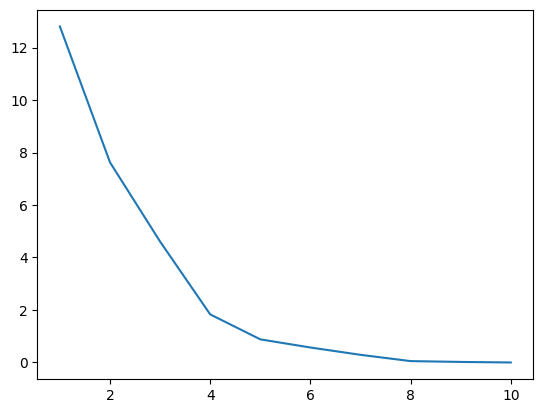

In [ ]:
plt.plot (range(1,11), wcss)

In [ ]:
kmeans = KMeans(n_clusters=3)#, random_state=0, n_init="auto").fit(Stores_clustering_for_fit)

In [ ]:
y_predicted = kmeans.fit_predict(Stores_clustering_for_fit)
y_predicted

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 0, 2, 0, 1, 1, 1, 1, 2, 1], dtype=int32)

In [ ]:
Stores_clustering_1['cluster'] = y_predicted
Stores_clustering_1[['tiendas', 'cluster']]

,tiendas,cluster
0,Back_Bay,1
1,Brooklyn,0
2,Greenwich_Village,2
3,Harlem,0
4,Midtown_Village,1
5,Queen_Village,1
6,Roxbury,1
7,South_End,1
8,Tribeca,2
9,Yorktown,1


In [ ]:
Stores_clustering_1.groupby('cluster').mean().T

cluster,0,1,2
ACCESORIES_mean,1063.945133,910.005015,1626.216814
HOME_&_GARDEN_mean,1092.267908,1280.055396,1982.881089
SUPERMARKET_mean,2191.956855,3003.205405,4487.340988
weekend_seals_mean,3161.525547,3839.539842,5989.083942
weekdays_seals_mean,2316.527106,2978.688034,4513.684982
spring_month_mean,2515.060140,3174.923569,4862.527726
summer_month_mean,2629.806595,3283.477288,5198.174516
autumn_month_mean,2604.756057,3221.917969,4976.750717
winter_month_mean,2483.331414,3205.680119,4694.215382


In [ ]:
t = Stores_clustering_1[['region']].replace(['[Boston]'], ['Boston'], inplace=True)
Stores_clustering_1['region'].replace(['[New York]'], ['New York'], inplace=True)
Stores_clustering_1['region'].replace(['[Philadelphia]'], ['Philadelphia'], inplace=True)
t

<ipython-input-121-9bd8d0435dbe>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t = Stores_clustering_1[['region']].replace(['[Boston]'], ['Boston'], inplace=True)


In [ ]:
t

In [ ]:
s = Stores_clustering_1.select_dtypes(include=np.number).round()/10 #esto lo hago porque sino el Power BI no me lee bien los valores (por el divisor decimal), 
                                                                    #lo quise arreglar pero al final esta fue la unica opcion que me quedo

In [ ]:
r = pd.DataFrame(Stores_clustering_1[['tiendas', 'region']])

In [ ]:
f= pd.concat([r,s], axis=1)

In [ ]:
f.at[5, 'cluster']=0

In [ ]:
f

,tiendas,region,ACCESORIES_mean,HOME_&_GARDEN_mean,SUPERMARKET_mean,weekend_seals_mean,weekdays_seals_mean,spring_month_mean,summer_month_mean,autumn_month_mean,winter_month_mean,cluster
0,Back_Bay,[Boston],93.3,133.6,289.7,372.9,296.4,314.0,332.8,320.0,306.0,0.1
1,Brooklyn,[New York],99.9,68.7,196.2,242.8,203.1,213.4,217.9,219.0,205.9,0.0
2,Greenwich_Village,[New York],155.2,137.6,374.4,509.7,359.3,399.6,421.3,402.7,387.1,0.2
3,Harlem,[New York],112.9,149.7,242.2,389.5,260.2,289.7,308.0,301.9,290.8,0.0
4,Midtown_Village,[Philadelphia],116.1,100.8,239.3,339.0,241.1,266.5,264.2,263.8,279.3,0.1
5,Queen_Village,[Philadelphia],82.6,117.5,329.2,400.2,310.2,333.2,331.5,334.8,345.5,0.0
6,Roxbury,[Boston],112.6,149.3,349.0,456.5,345.3,372.2,395.1,375.3,365.9,0.1
7,South_End,[Boston],75.9,132.6,262.9,355.7,267.1,292.9,305.2,289.4,280.9,0.1
8,Tribeca,[New York],170.1,259.0,523.0,688.1,543.4,572.9,618.3,592.6,551.7,0.2
9,Yorktown,[Philadelphia],65.5,134.3,331.8,379.4,327.1,326.1,341.3,349.7,345.8,0.1


In [ ]:
f.to_csv('Stores_clustering.csv', index= False)
files.download('Stores_clustering.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Forecasting

##1

In [ ]:
df_item_sales_1 = df_item_sales.copy()

In [ ]:
df_item_sales_1.set_index(['id', 'item', 'category', 'department', 'store', 'store_code', 'region'], inplace=True)

In [ ]:
date_strings = []
for i in df_item_sales_1.columns:
  date_strings.append(i)


In [ ]:
# Create a list of all date strings
date_strings 

# Extract the day number from each date string and create a new list of day numbers
day_numbers = [int(date_string.split('_')[1]) for date_string in date_strings]

# Create a Pandas datetime index using the day numbers
date_index = pd.date_range(start='2011-01-29', periods=len(day_numbers), freq='D')

# Assign the new datetime index to your DataFrame
df_item_sales_1.columns = date_index



In [ ]:
df_item_sales_1.reset_index(inplace=True)

In [ ]:
df_item_sales_1

,id,item,category,department,store,store_code,region,2011-01-29 00:00:00,2011-01-30 00:00:00,2011-01-31 00:00:00,...,2016-04-15 00:00:00,2016-04-16 00:00:00,2016-04-17 00:00:00,2016-04-18 00:00:00,2016-04-19 00:00:00,2016-04-20 00:00:00,2016-04-21 00:00:00,2016-04-22 00:00:00,2016-04-23 00:00:00,2016-04-24 00:00:00
0,ACCESORIES_1_001_NYC_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,ACCESORIES_1_002_NYC_1,ACCESORIES_1_002,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,ACCESORIES_1_003_NYC_1,ACCESORIES_1_003,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,ACCESORIES_1_004_NYC_1,ACCESORIES_1_004,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,ACCESORIES_1_005_NYC_1,ACCESORIES_1_005,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,2,1,1,0,1,1,2,2,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30485,SUPERMARKET_3_823_PHI_3,SUPERMARKET_3_823,SUPERMARKET,SUPERMARKET_3,Queen_Village,PHI_3,Philadelphia,0,0,2,...,2,0,0,0,0,0,1,0,0,1
30486,SUPERMARKET_3_824_PHI_3,SUPERMARKET_3_824,SUPERMARKET,SUPERMARKET_3,Queen_Village,PHI_3,Philadelphia,0,0,0,...,0,0,0,0,0,0,0,0,1,0
30487,SUPERMARKET_3_825_PHI_3,SUPERMARKET_3_825,SUPERMARKET,SUPERMARKET_3,Queen_Village,PHI_3,Philadelphia,0,6,0,...,2,1,0,2,0,1,0,0,1,0
30488,SUPERMARKET_3_826_PHI_3,SUPERMARKET_3_826,SUPERMARKET,SUPERMARKET_3,Queen_Village,PHI_3,Philadelphia,0,0,0,...,0,0,1,0,0,1,0,3,1,3


In [ ]:
melt = df_item_sales_1.iloc[: , 7:]
melt

,2011-01-29,2011-01-30,2011-01-31,2011-02-01,2011-02-02,2011-02-03,2011-02-04,2011-02-05,2011-02-06,2011-02-07,...,2016-04-15,2016-04-16,2016-04-17,2016-04-18,2016-04-19,2016-04-20,2016-04-21,2016-04-22,2016-04-23,2016-04-24
0,0,0,0,0,0,0,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,0,0,0,0,0,0,0,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,0,0,0,0,0,0,0,0,0,0,...,2,1,1,0,1,1,2,2,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30485,0,0,2,2,0,3,1,4,1,0,...,2,0,0,0,0,0,1,0,0,1
30486,0,0,0,0,0,5,0,1,1,3,...,0,0,0,0,0,0,0,0,1,0
30487,0,6,0,2,2,4,1,8,5,2,...,2,1,0,2,0,1,0,0,1,0
30488,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,3,1,3


In [ ]:
dfa = pd.melt(df_item_sales_1, id_vars = ['store', 'id', 'item'], value_vars = melt, var_name="day", value_name="value")

In [ ]:
dfa

,store,id,item,day,value
0,Greenwich_Village,ACCESORIES_1_001_NYC_1,ACCESORIES_1_001,2011-01-29,0
1,Greenwich_Village,ACCESORIES_1_002_NYC_1,ACCESORIES_1_002,2011-01-29,0
2,Greenwich_Village,ACCESORIES_1_003_NYC_1,ACCESORIES_1_003,2011-01-29,0
3,Greenwich_Village,ACCESORIES_1_004_NYC_1,ACCESORIES_1_004,2011-01-29,0
4,Greenwich_Village,ACCESORIES_1_005_NYC_1,ACCESORIES_1_005,2011-01-29,0
...,...,...,...,...,...
58327365,Queen_Village,SUPERMARKET_3_823_PHI_3,SUPERMARKET_3_823,2016-04-24,1
58327366,Queen_Village,SUPERMARKET_3_824_PHI_3,SUPERMARKET_3_824,2016-04-24,0
58327367,Queen_Village,SUPERMARKET_3_825_PHI_3,SUPERMARKET_3_825,2016-04-24,0
58327368,Queen_Village,SUPERMARKET_3_826_PHI_3,SUPERMARKET_3_826,2016-04-24,3


In [ ]:
dfa.rename(columns= {'day' : 'date', 'value': 'monthly_sales'}, inplace= True)

In [ ]:
df_a = dfa.set_index('date').groupby(['store', 'id']).resample('M').sum().reset_index()

Se truncaron las últimas líneas 5000 del resultado de transmisión.
<ipython-input-15-a027c21b4d8e>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_a = dfa.set_index('date').groupby(['store', 'id']).resample('M').sum().reset_index()
<ipython-input-15-a027c21b4d8e>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_a = dfa.set_index('date').groupby(['store', 'id']).resample('M').sum().reset_index()
<ipython-input-15-a027c21b4d8e>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or 

In [ ]:
df_a

,store,id,date,monthly_sales
0,Back_Bay,ACCESORIES_1_001_BOS_3,2011-01-31,0
1,Back_Bay,ACCESORIES_1_001_BOS_3,2011-02-28,0
2,Back_Bay,ACCESORIES_1_001_BOS_3,2011-03-31,0
3,Back_Bay,ACCESORIES_1_001_BOS_3,2011-04-30,0
4,Back_Bay,ACCESORIES_1_001_BOS_3,2011-05-31,0
...,...,...,...,...
1951355,Yorktown,SUPERMARKET_3_827_PHI_2,2015-12-31,60
1951356,Yorktown,SUPERMARKET_3_827_PHI_2,2016-01-31,77
1951357,Yorktown,SUPERMARKET_3_827_PHI_2,2016-02-29,108
1951358,Yorktown,SUPERMARKET_3_827_PHI_2,2016-03-31,89


In [ ]:
#df_0['day'].min()

10+12+12+12+12+4 = 64

In [ ]:
#df_0['day'].max()

In [ ]:
size = df_a.groupby("id").size()
size

id
ACCESORIES_1_001_BOS_1     64
ACCESORIES_1_001_BOS_2     64
ACCESORIES_1_001_BOS_3     64
ACCESORIES_1_001_NYC_1     64
ACCESORIES_1_001_NYC_2     64
                           ..
SUPERMARKET_3_827_NYC_3    64
SUPERMARKET_3_827_NYC_4    64
SUPERMARKET_3_827_PHI_1    64
SUPERMARKET_3_827_PHI_2    64
SUPERMARKET_3_827_PHI_3    64
Length: 30490, dtype: int64

In [ ]:
df_item_sales_1

,id,item,category,department,store,store_code,region,2011-01-29 00:00:00,2011-01-30 00:00:00,2011-01-31 00:00:00,...,2016-04-15 00:00:00,2016-04-16 00:00:00,2016-04-17 00:00:00,2016-04-18 00:00:00,2016-04-19 00:00:00,2016-04-20 00:00:00,2016-04-21 00:00:00,2016-04-22 00:00:00,2016-04-23 00:00:00,2016-04-24 00:00:00
0,ACCESORIES_1_001_NYC_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,ACCESORIES_1_002_NYC_1,ACCESORIES_1_002,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,ACCESORIES_1_003_NYC_1,ACCESORIES_1_003,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,ACCESORIES_1_004_NYC_1,ACCESORIES_1_004,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,ACCESORIES_1_005_NYC_1,ACCESORIES_1_005,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,2,1,1,0,1,1,2,2,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30485,SUPERMARKET_3_823_PHI_3,SUPERMARKET_3_823,SUPERMARKET,SUPERMARKET_3,Queen_Village,PHI_3,Philadelphia,0,0,2,...,2,0,0,0,0,0,1,0,0,1
30486,SUPERMARKET_3_824_PHI_3,SUPERMARKET_3_824,SUPERMARKET,SUPERMARKET_3,Queen_Village,PHI_3,Philadelphia,0,0,0,...,0,0,0,0,0,0,0,0,1,0
30487,SUPERMARKET_3_825_PHI_3,SUPERMARKET_3_825,SUPERMARKET,SUPERMARKET_3,Queen_Village,PHI_3,Philadelphia,0,6,0,...,2,1,0,2,0,1,0,0,1,0
30488,SUPERMARKET_3_826_PHI_3,SUPERMARKET_3_826,SUPERMARKET,SUPERMARKET_3,Queen_Village,PHI_3,Philadelphia,0,0,0,...,0,0,1,0,0,1,0,3,1,3


In [ ]:
df_item_sales_m = df_item_sales_1[['id','item','department','category',	'store',	'store_code',	'region']]
df_item_sales_m

,id,item,department,category,store,store_code,region
0,ACCESORIES_1_001_NYC_1,ACCESORIES_1_001,ACCESORIES_1,ACCESORIES,Greenwich_Village,NYC_1,New York
1,ACCESORIES_1_002_NYC_1,ACCESORIES_1_002,ACCESORIES_1,ACCESORIES,Greenwich_Village,NYC_1,New York
2,ACCESORIES_1_003_NYC_1,ACCESORIES_1_003,ACCESORIES_1,ACCESORIES,Greenwich_Village,NYC_1,New York
3,ACCESORIES_1_004_NYC_1,ACCESORIES_1_004,ACCESORIES_1,ACCESORIES,Greenwich_Village,NYC_1,New York
4,ACCESORIES_1_005_NYC_1,ACCESORIES_1_005,ACCESORIES_1,ACCESORIES,Greenwich_Village,NYC_1,New York
...,...,...,...,...,...,...,...
30485,SUPERMARKET_3_823_PHI_3,SUPERMARKET_3_823,SUPERMARKET_3,SUPERMARKET,Queen_Village,PHI_3,Philadelphia
30486,SUPERMARKET_3_824_PHI_3,SUPERMARKET_3_824,SUPERMARKET_3,SUPERMARKET,Queen_Village,PHI_3,Philadelphia
30487,SUPERMARKET_3_825_PHI_3,SUPERMARKET_3_825,SUPERMARKET_3,SUPERMARKET,Queen_Village,PHI_3,Philadelphia
30488,SUPERMARKET_3_826_PHI_3,SUPERMARKET_3_826,SUPERMARKET_3,SUPERMARKET,Queen_Village,PHI_3,Philadelphia


In [ ]:
df_a

,store,id,date,monthly_sales
0,Back_Bay,ACCESORIES_1_001_BOS_3,2011-01-31,0
1,Back_Bay,ACCESORIES_1_001_BOS_3,2011-02-28,0
2,Back_Bay,ACCESORIES_1_001_BOS_3,2011-03-31,0
3,Back_Bay,ACCESORIES_1_001_BOS_3,2011-04-30,0
4,Back_Bay,ACCESORIES_1_001_BOS_3,2011-05-31,0
...,...,...,...,...
1951355,Yorktown,SUPERMARKET_3_827_PHI_2,2015-12-31,60
1951356,Yorktown,SUPERMARKET_3_827_PHI_2,2016-01-31,77
1951357,Yorktown,SUPERMARKET_3_827_PHI_2,2016-02-29,108
1951358,Yorktown,SUPERMARKET_3_827_PHI_2,2016-03-31,89


In [ ]:
semi_final_df = pd.merge(left= df_a, right=df_item_sales_m, how='left', on= ['id', 'store'] )

In [ ]:
#semi_final_df.rename(columns= {'day' : 'date', 'value': 'monthly_sales'}, inplace= True)

In [ ]:
semi_final_df

,store,id,date,monthly_sales,item,department,category,store_code,region
0,Back_Bay,ACCESORIES_1_001_BOS_3,2011-01-31,0,ACCESORIES_1_001,ACCESORIES_1,ACCESORIES,BOS_3,Boston
1,Back_Bay,ACCESORIES_1_001_BOS_3,2011-02-28,0,ACCESORIES_1_001,ACCESORIES_1,ACCESORIES,BOS_3,Boston
2,Back_Bay,ACCESORIES_1_001_BOS_3,2011-03-31,0,ACCESORIES_1_001,ACCESORIES_1,ACCESORIES,BOS_3,Boston
3,Back_Bay,ACCESORIES_1_001_BOS_3,2011-04-30,0,ACCESORIES_1_001,ACCESORIES_1,ACCESORIES,BOS_3,Boston
4,Back_Bay,ACCESORIES_1_001_BOS_3,2011-05-31,0,ACCESORIES_1_001,ACCESORIES_1,ACCESORIES,BOS_3,Boston
...,...,...,...,...,...,...,...,...,...
1951355,Yorktown,SUPERMARKET_3_827_PHI_2,2015-12-31,60,SUPERMARKET_3_827,SUPERMARKET_3,SUPERMARKET,PHI_2,Philadelphia
1951356,Yorktown,SUPERMARKET_3_827_PHI_2,2016-01-31,77,SUPERMARKET_3_827,SUPERMARKET_3,SUPERMARKET,PHI_2,Philadelphia
1951357,Yorktown,SUPERMARKET_3_827_PHI_2,2016-02-29,108,SUPERMARKET_3_827,SUPERMARKET_3,SUPERMARKET,PHI_2,Philadelphia
1951358,Yorktown,SUPERMARKET_3_827_PHI_2,2016-03-31,89,SUPERMARKET_3_827,SUPERMARKET_3,SUPERMARKET,PHI_2,Philadelphia


##Merge semi_final_df and item_sale_price


In [ ]:
df_item_price_1 = df_item_price.copy()

In [ ]:
df_item_price_1


,item,category,store_code,yearweek,sell_price
0,ACCESORIES_1_001,ACCESORIES,NYC_1,201328.0,12.7414
1,ACCESORIES_1_001,ACCESORIES,NYC_1,201329.0,12.7414
2,ACCESORIES_1_001,ACCESORIES,NYC_1,201330.0,10.9858
3,ACCESORIES_1_001,ACCESORIES,NYC_1,201331.0,10.9858
4,ACCESORIES_1_001,ACCESORIES,NYC_1,201332.0,10.9858
...,...,...,...,...,...
6965701,SUPERMARKET_3_827,SUPERMARKET,PHI_3,NaN,1.2000
6965702,SUPERMARKET_3_827,SUPERMARKET,PHI_3,NaN,1.2000
6965703,SUPERMARKET_3_827,SUPERMARKET,PHI_3,NaN,1.2000
6965704,SUPERMARKET_3_827,SUPERMARKET,PHI_3,NaN,1.2000


In [ ]:
df_item_price_1['sell_price'].isna().sum()

0

In [ ]:
df_item_price_1['yearweek'].isna().sum()

243920

In [ ]:
df_item_price_1.dropna(inplace=True)

In [ ]:
df_item_price_1['yearweek'] = df_item_price_1['yearweek'].astype(str)

In [ ]:
df_item_price_1['year'] = [x.split('.')[0] for x in df_item_price_1['yearweek']]

In [ ]:
df_item_price_1

,item,category,store_code,yearweek,sell_price,year
0,ACCESORIES_1_001,ACCESORIES,NYC_1,201328.0,12.7414,201328
1,ACCESORIES_1_001,ACCESORIES,NYC_1,201329.0,12.7414,201329
2,ACCESORIES_1_001,ACCESORIES,NYC_1,201330.0,10.9858,201330
3,ACCESORIES_1_001,ACCESORIES,NYC_1,201331.0,10.9858,201331
4,ACCESORIES_1_001,ACCESORIES,NYC_1,201332.0,10.9858,201332
...,...,...,...,...,...,...
6965693,SUPERMARKET_3_827,SUPERMARKET,PHI_3,201613.0,1.2000,201613
6965694,SUPERMARKET_3_827,SUPERMARKET,PHI_3,201614.0,1.2000,201614
6965695,SUPERMARKET_3_827,SUPERMARKET,PHI_3,201615.0,1.2000,201615
6965696,SUPERMARKET_3_827,SUPERMARKET,PHI_3,201616.0,1.2000,201616


In [ ]:
del(df_item_price_1['yearweek'])

In [ ]:
df_item_price_1['year'].value_counts(dropna=False)

201608    30490
201617    30490
201615    30490
201614    30490
201613    30490
          ...  
201109    13033
201108    12799
201107    12519
201106    11975
201105    10932
Name: year, Length: 279, dtype: int64

In [ ]:
df_item_price_1['year'].isna().sum()

0

In [ ]:
df_item_price_1['year']

0          201328
1          201329
2          201330
3          201331
4          201332
            ...  
6965693    201613
6965694    201614
6965695    201615
6965696    201616
6965697    201617
Name: year, Length: 6721786, dtype: object

In [ ]:
#df_item_price_1['year'] = df_item_price_1['year'].apply(lambda x: 'NaN' if x == 'nan' else x)

In [ ]:
df_item_price_1['year'].unique()

array(['201328', '201329', '201330', '201331', '201332', '201333',
       '201334', '201335', '201336', '201337', '201338', '201339',
       '201340', '201341', '201342', '201343', '201344', '201345',
       '201346', '201347', '201348', '201349', '201350', '201351',
       '201352', '201400', '201401', '201402', '201403', '201404',
       '201405', '201406', '201407', '201408', '201409', '201410',
       '201411', '201412', '201413', '201414', '201415', '201416',
       '201417', '201418', '201419', '201420', '201421', '201422',
       '201423', '201424', '201425', '201426', '201427', '201428',
       '201429', '201430', '201431', '201432', '201433', '201434',
       '201435', '201436', '201437', '201438', '201439', '201440',
       '201441', '201442', '201443', '201444', '201445', '201446',
       '201447', '201448', '201449', '201450', '201451', '201452',
       '201500', '201501', '201502', '201503', '201504', '201505',
       '201506', '201507', '201508', '201509', '201510', '2015

In [ ]:
df_item_price_1['year'].value_counts()

201608    30490
201617    30490
201615    30490
201614    30490
201613    30490
          ...  
201109    13033
201108    12799
201107    12519
201106    11975
201105    10932
Name: year, Length: 279, dtype: int64

In [ ]:
def transform_date(date_str):
    date_obj = datetime.strptime(date_str + '1', '%Y%W%w')
    output_str = date_obj.strftime('%Y-%m-%d')
    return output_str

In [ ]:
df_item_price_1['date'] = df_item_price_1['year'].apply(transform_date)

In [ ]:
df_item_price_1['date'] = pd.to_datetime(df_item_price_1['date'])

In [ ]:
df_item_price_1

,item,category,store_code,sell_price,year,date
0,ACCESORIES_1_001,ACCESORIES,NYC_1,12.7414,201328,2013-07-15
1,ACCESORIES_1_001,ACCESORIES,NYC_1,12.7414,201329,2013-07-22
2,ACCESORIES_1_001,ACCESORIES,NYC_1,10.9858,201330,2013-07-29
3,ACCESORIES_1_001,ACCESORIES,NYC_1,10.9858,201331,2013-08-05
4,ACCESORIES_1_001,ACCESORIES,NYC_1,10.9858,201332,2013-08-12
...,...,...,...,...,...,...
6965693,SUPERMARKET_3_827,SUPERMARKET,PHI_3,1.2000,201613,2016-03-28
6965694,SUPERMARKET_3_827,SUPERMARKET,PHI_3,1.2000,201614,2016-04-04
6965695,SUPERMARKET_3_827,SUPERMARKET,PHI_3,1.2000,201615,2016-04-11
6965696,SUPERMARKET_3_827,SUPERMARKET,PHI_3,1.2000,201616,2016-04-18


In [ ]:
df_item_price_m = df_item_price_1.set_index('date').groupby('item').resample('M')['sell_price'].mean().to_frame()
df_item_price_m  #sum? o mean?

sell_price
item              date                  
ACCESORIES_1_001  2013-07-31   12.014333
                  2013-08-31   11.257120
                  2013-09-30   11.081560
                  2013-10-31   11.081560
                  2013-11-30   11.057620
...                                  ...
SUPERMARKET_3_827 2015-12-31    1.200000
                  2016-01-31    1.200000
                  2016-02-29    1.188000
                  2016-03-31    1.200000
                  2016-04-30    1.200000

[160427 rows x 1 columns]

In [ ]:
final_df = pd.merge(semi_final_df,df_item_price_m, how = 'left', on = ['item', 'date'] )

In [ ]:
#final_df.fillna(0, inplace =True)

In [ ]:
final_df

,store,id,date,monthly_sales,item,department,category,store_code,region,sell_price
0,Back_Bay,ACCESORIES_1_001_BOS_3,2011-01-31,0,ACCESORIES_1_001,ACCESORIES_1,ACCESORIES,BOS_3,Boston,NaN
1,Back_Bay,ACCESORIES_1_001_BOS_3,2011-02-28,0,ACCESORIES_1_001,ACCESORIES_1,ACCESORIES,BOS_3,Boston,NaN
2,Back_Bay,ACCESORIES_1_001_BOS_3,2011-03-31,0,ACCESORIES_1_001,ACCESORIES_1,ACCESORIES,BOS_3,Boston,NaN
3,Back_Bay,ACCESORIES_1_001_BOS_3,2011-04-30,0,ACCESORIES_1_001,ACCESORIES_1,ACCESORIES,BOS_3,Boston,NaN
4,Back_Bay,ACCESORIES_1_001_BOS_3,2011-05-31,0,ACCESORIES_1_001,ACCESORIES_1,ACCESORIES,BOS_3,Boston,NaN
...,...,...,...,...,...,...,...,...,...,...
1951355,Yorktown,SUPERMARKET_3_827_PHI_2,2015-12-31,60,SUPERMARKET_3_827,SUPERMARKET_3,SUPERMARKET,PHI_2,Philadelphia,1.200
1951356,Yorktown,SUPERMARKET_3_827_PHI_2,2016-01-31,77,SUPERMARKET_3_827,SUPERMARKET_3,SUPERMARKET,PHI_2,Philadelphia,1.200
1951357,Yorktown,SUPERMARKET_3_827_PHI_2,2016-02-29,108,SUPERMARKET_3_827,SUPERMARKET_3,SUPERMARKET,PHI_2,Philadelphia,1.188
1951358,Yorktown,SUPERMARKET_3_827_PHI_2,2016-03-31,89,SUPERMARKET_3_827,SUPERMARKET_3,SUPERMARKET,PHI_2,Philadelphia,1.200


In [ ]:
#final_df['Revenue'] = final_df['monthly_sales']*final_df['sell_price']


In [ ]:
#final_df['Revenue'].sum()

In [ ]:
df_calendar

,date,weekday,weekday_int,d,event
0,2011-01-29,Saturday,1,d_1,NaN
1,2011-01-30,Sunday,2,d_2,NaN
2,2011-01-31,Monday,3,d_3,NaN
3,2011-02-01,Tuesday,4,d_4,NaN
4,2011-02-02,Wednesday,5,d_5,NaN
...,...,...,...,...,...
1908,2016-04-20,Wednesday,5,d_1909,NaN
1909,2016-04-21,Thursday,6,d_1910,NaN
1910,2016-04-22,Friday,7,d_1911,NaN
1911,2016-04-23,Saturday,1,d_1912,NaN


In [ ]:
df_calendar_1 = df_calendar[['date','weekday', 'event']]

In [ ]:
df_calendar_1['date']  = pd.to_datetime(df_calendar_1['date'])

<ipython-input-52-adeda240ff82>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_calendar_1['date']  = pd.to_datetime(df_calendar_1['date'])


In [ ]:
df_final_analysis = pd.merge(final_df,df_calendar_1, how = 'left', on= 'date' )

In [ ]:
df_final_analysis['weekday'].unique()

array(['Monday', 'Thursday', 'Saturday', 'Tuesday', 'Sunday', 'Wednesday',
       'Friday', nan], dtype=object)

In [ ]:
df_final_analysis

,store,id,date,monthly_sales,item,department,category,store_code,region,sell_price,weekday,event
0,Back_Bay,ACCESORIES_1_001_BOS_3,2011-01-31,0,ACCESORIES_1_001,ACCESORIES_1,ACCESORIES,BOS_3,Boston,NaN,Monday,NaN
1,Back_Bay,ACCESORIES_1_001_BOS_3,2011-02-28,0,ACCESORIES_1_001,ACCESORIES_1,ACCESORIES,BOS_3,Boston,NaN,Monday,NaN
2,Back_Bay,ACCESORIES_1_001_BOS_3,2011-03-31,0,ACCESORIES_1_001,ACCESORIES_1,ACCESORIES,BOS_3,Boston,NaN,Thursday,NaN
3,Back_Bay,ACCESORIES_1_001_BOS_3,2011-04-30,0,ACCESORIES_1_001,ACCESORIES_1,ACCESORIES,BOS_3,Boston,NaN,Saturday,NaN
4,Back_Bay,ACCESORIES_1_001_BOS_3,2011-05-31,0,ACCESORIES_1_001,ACCESORIES_1,ACCESORIES,BOS_3,Boston,NaN,Tuesday,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1951355,Yorktown,SUPERMARKET_3_827_PHI_2,2015-12-31,60,SUPERMARKET_3_827,SUPERMARKET_3,SUPERMARKET,PHI_2,Philadelphia,1.200,Thursday,NaN
1951356,Yorktown,SUPERMARKET_3_827_PHI_2,2016-01-31,77,SUPERMARKET_3_827,SUPERMARKET_3,SUPERMARKET,PHI_2,Philadelphia,1.200,Sunday,NaN
1951357,Yorktown,SUPERMARKET_3_827_PHI_2,2016-02-29,108,SUPERMARKET_3_827,SUPERMARKET_3,SUPERMARKET,PHI_2,Philadelphia,1.188,Monday,NaN
1951358,Yorktown,SUPERMARKET_3_827_PHI_2,2016-03-31,89,SUPERMARKET_3_827,SUPERMARKET_3,SUPERMARKET,PHI_2,Philadelphia,1.200,Thursday,NaN


In [ ]:
df_final_analysis.fillna(0, inplace=True)

In [ ]:
final_df['sell_price'].max()

40.2381525

In [ ]:
df_item_price['sell_price'].max()

134.14999999999998

##EDA

In [ ]:
df_final_analysis['monthly_sales'].describe()

count    1.951360e+06
mean     3.366647e+01
std      9.747178e+01
min      0.000000e+00
25%      0.000000e+00
50%      9.000000e+00
75%      3.100000e+01
max      1.082100e+04
Name: monthly_sales, dtype: float64

<Axes: xlabel='monthly_sales', ylabel='Density'>

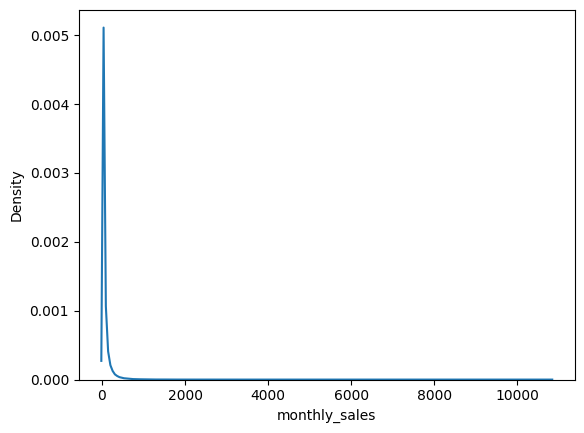

In [ ]:
sns.kdeplot(df_final_analysis['monthly_sales'])

In [ ]:
#df_final_analysis = df_final_analysis[df_final_analysis['monthly_sales'] <= 15]

In [ ]:
df_final_analysis[df_final_analysis['monthly_sales'] > 150]

,store,id,date,monthly_sales,item,department,category,store_code,region,sell_price,weekday,event
453,Back_Bay,ACCESORIES_1_008_BOS_3,2011-06-30,194,ACCESORIES_1_008,ACCESORIES_1,ACCESORIES,BOS_3,Boston,0.66500,Thursday,0
454,Back_Bay,ACCESORIES_1_008_BOS_3,2011-07-31,220,ACCESORIES_1_008,ACCESORIES_1,ACCESORIES,BOS_3,Boston,0.66500,Sunday,0
455,Back_Bay,ACCESORIES_1_008_BOS_3,2011-08-31,182,ACCESORIES_1_008,ACCESORIES_1,ACCESORIES,BOS_3,Boston,0.66500,Wednesday,0
478,Back_Bay,ACCESORIES_1_008_BOS_3,2013-07-31,169,ACCESORIES_1_008,ACCESORIES_1,ACCESORIES,BOS_3,Boston,0.61180,Wednesday,0
481,Back_Bay,ACCESORIES_1_008_BOS_3,2013-10-31,170,ACCESORIES_1_008,ACCESORIES_1,ACCESORIES,BOS_3,Boston,0.61180,Thursday,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1951013,Yorktown,SUPERMARKET_3_822_PHI_2,2014-02-28,273,SUPERMARKET_3_822,SUPERMARKET_3,SUPERMARKET,PHI_2,Philadelphia,3.87600,Friday,0
1951015,Yorktown,SUPERMARKET_3_822_PHI_2,2014-04-30,355,SUPERMARKET_3_822,SUPERMARKET_3,SUPERMARKET,PHI_2,Philadelphia,3.65880,Wednesday,0
1951016,Yorktown,SUPERMARKET_3_822_PHI_2,2014-05-31,198,SUPERMARKET_3_822,SUPERMARKET_3,SUPERMARKET,PHI_2,Philadelphia,4.18800,Saturday,0
1951037,Yorktown,SUPERMARKET_3_822_PHI_2,2016-02-29,175,SUPERMARKET_3_822,SUPERMARKET_3,SUPERMARKET,PHI_2,Philadelphia,4.82472,Monday,0


In [ ]:

df_final_analysis = df_final_analysis[df_final_analysis['monthly_sales'] <= 150]


In [ ]:
#df_final_analysis = df_final_analysis.drop(df_final_analysis[df_final_analysis['monthly_sales'] > 10].index)


In [ ]:
df_final_analysis[df_final_analysis['monthly_sales']>10].describe()

,monthly_sales,sell_price
count,843461.000000,843461.000000
mean,40.812848,4.996236
std,30.888388,3.915074
min,11.000000,0.215667
25%,18.000000,2.462500
50%,30.000000,3.712500
75%,53.000000,6.187500
max,150.000000,40.238152


<Axes: xlabel='monthly_sales', ylabel='Density'>

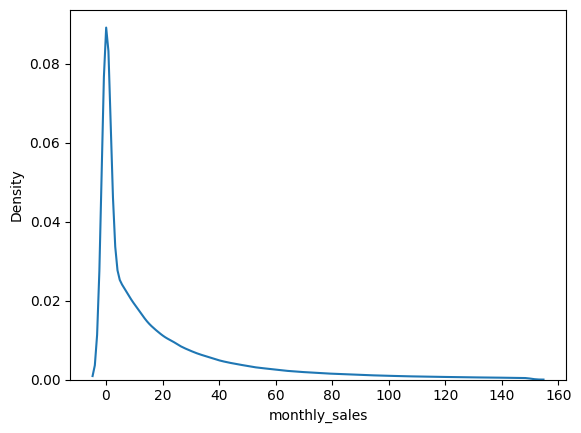

In [ ]:
sns.kdeplot(df_final_analysis['monthly_sales'])

###total sales/day

In [ ]:
dfa

,store,id,item,date,monthly_sales
0,Greenwich_Village,ACCESORIES_1_001_NYC_1,ACCESORIES_1_001,2011-01-29,0
1,Greenwich_Village,ACCESORIES_1_002_NYC_1,ACCESORIES_1_002,2011-01-29,0
2,Greenwich_Village,ACCESORIES_1_003_NYC_1,ACCESORIES_1_003,2011-01-29,0
3,Greenwich_Village,ACCESORIES_1_004_NYC_1,ACCESORIES_1_004,2011-01-29,0
4,Greenwich_Village,ACCESORIES_1_005_NYC_1,ACCESORIES_1_005,2011-01-29,0
...,...,...,...,...,...
58327365,Queen_Village,SUPERMARKET_3_823_PHI_3,SUPERMARKET_3_823,2016-04-24,1
58327366,Queen_Village,SUPERMARKET_3_824_PHI_3,SUPERMARKET_3_824,2016-04-24,0
58327367,Queen_Village,SUPERMARKET_3_825_PHI_3,SUPERMARKET_3_825,2016-04-24,0
58327368,Queen_Village,SUPERMARKET_3_826_PHI_3,SUPERMARKET_3_826,2016-04-24,3


In [ ]:
semi_final_df

,store,id,date,monthly_sales,item,department,category,store_code,region
0,Back_Bay,ACCESORIES_1_001_BOS_3,2011-01-31,0,ACCESORIES_1_001,ACCESORIES_1,ACCESORIES,BOS_3,Boston
1,Back_Bay,ACCESORIES_1_001_BOS_3,2011-02-28,0,ACCESORIES_1_001,ACCESORIES_1,ACCESORIES,BOS_3,Boston
2,Back_Bay,ACCESORIES_1_001_BOS_3,2011-03-31,0,ACCESORIES_1_001,ACCESORIES_1,ACCESORIES,BOS_3,Boston
3,Back_Bay,ACCESORIES_1_001_BOS_3,2011-04-30,0,ACCESORIES_1_001,ACCESORIES_1,ACCESORIES,BOS_3,Boston
4,Back_Bay,ACCESORIES_1_001_BOS_3,2011-05-31,0,ACCESORIES_1_001,ACCESORIES_1,ACCESORIES,BOS_3,Boston
...,...,...,...,...,...,...,...,...,...
1951355,Yorktown,SUPERMARKET_3_827_PHI_2,2015-12-31,60,SUPERMARKET_3_827,SUPERMARKET_3,SUPERMARKET,PHI_2,Philadelphia
1951356,Yorktown,SUPERMARKET_3_827_PHI_2,2016-01-31,77,SUPERMARKET_3_827,SUPERMARKET_3,SUPERMARKET,PHI_2,Philadelphia
1951357,Yorktown,SUPERMARKET_3_827_PHI_2,2016-02-29,108,SUPERMARKET_3_827,SUPERMARKET_3,SUPERMARKET,PHI_2,Philadelphia
1951358,Yorktown,SUPERMARKET_3_827_PHI_2,2016-03-31,89,SUPERMARKET_3_827,SUPERMARKET_3,SUPERMARKET,PHI_2,Philadelphia


###total sales/week

In [ ]:
df_final_analysis

,store,id,date,monthly_sales,item,department,category,store_code,region,sell_price,weekday,event
0,Back_Bay,ACCESORIES_1_001_BOS_3,2011-01-31,0,ACCESORIES_1_001,ACCESORIES_1,ACCESORIES,BOS_3,Boston,0.000,Monday,0
1,Back_Bay,ACCESORIES_1_001_BOS_3,2011-02-28,0,ACCESORIES_1_001,ACCESORIES_1,ACCESORIES,BOS_3,Boston,0.000,Monday,0
2,Back_Bay,ACCESORIES_1_001_BOS_3,2011-03-31,0,ACCESORIES_1_001,ACCESORIES_1,ACCESORIES,BOS_3,Boston,0.000,Thursday,0
3,Back_Bay,ACCESORIES_1_001_BOS_3,2011-04-30,0,ACCESORIES_1_001,ACCESORIES_1,ACCESORIES,BOS_3,Boston,0.000,Saturday,0
4,Back_Bay,ACCESORIES_1_001_BOS_3,2011-05-31,0,ACCESORIES_1_001,ACCESORIES_1,ACCESORIES,BOS_3,Boston,0.000,Tuesday,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1951355,Yorktown,SUPERMARKET_3_827_PHI_2,2015-12-31,60,SUPERMARKET_3_827,SUPERMARKET_3,SUPERMARKET,PHI_2,Philadelphia,1.200,Thursday,0
1951356,Yorktown,SUPERMARKET_3_827_PHI_2,2016-01-31,77,SUPERMARKET_3_827,SUPERMARKET_3,SUPERMARKET,PHI_2,Philadelphia,1.200,Sunday,0
1951357,Yorktown,SUPERMARKET_3_827_PHI_2,2016-02-29,108,SUPERMARKET_3_827,SUPERMARKET_3,SUPERMARKET,PHI_2,Philadelphia,1.188,Monday,0
1951358,Yorktown,SUPERMARKET_3_827_PHI_2,2016-03-31,89,SUPERMARKET_3_827,SUPERMARKET_3,SUPERMARKET,PHI_2,Philadelphia,1.200,Thursday,0


In [ ]:
df_final_analysis[['date', 'monthly_sales']].max()

### product popularity

In [ ]:
grouped_df = dfa.groupby(['region', 'store', 'item'])['monthly_sales'].sum().reset_index()

In [ ]:
pivot_df = pd.pivot_table(grouped_df, index=['region', 'store'], columns='item', values='monthly_sales')


In [ ]:
pivot_df

In [ ]:
pivot_df['SUPERMARKET_2_057']

In [ ]:
pivot_df.iloc[9].min()

In [ ]:
for i in range(10):
  print(pivot_df.iloc[i].min())

In [ ]:
plt.figure(figsize=(30,15))
sns.heatmap(pivot_df, cmap='coolwarm')

### popularity on time

In [ ]:
dfa.groupby(['item', 'date']).sum()

In [ ]:
product_sales = dfa.groupby(['item', 'date']).sum()

# Sort the DataFrame by descending sales
product_sales = product_sales.sort_values('monthly_sales', ascending=False)

# Plot the top products by sales
top_products = product_sales.groupby('item').sum().sort_values('monthly_sales', ascending=False)
top_products.plot(kind='bar')

# Group the sales data by product and day of the week
product_sales_weekday = dfa.groupby(['item', pd.to_datetime(dfa['date']).dt.dayofweek]).sum()

# Sort the DataFrame by descending sales
product_sales_weekday = product_sales_weekday.sort_values(['item', 'monthly_sales'], ascending=[True, False])

# Plot the top products by day of the week
for product in product_sales_weekday.index.levels[0]:
    plt.figure()
    plt.title(product)
    product_sales_weekday.loc[product].plot(kind='bar')

##Categorys


In [ ]:
df_final_analysis.select_dtypes(exclude = np.number).describe().T

<ipython-input-73-3af26387cc94>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_final_analysis.select_dtypes(exclude = np.number).describe().T


,count,unique,top,freq,first,last
store,1866426,10,Brooklyn,191025,NaT,NaT
id,1866426,30483,ACCESORIES_1_001_BOS_3,64,NaT,NaT
date,1866426,64,2011-01-31 00:00:00,30458,2011-01-31,2016-04-30
item,1866426,3049,ACCESORIES_1_001,640,NaT,NaT
department,1866426,7,SUPERMARKET_3,477990,NaT,NaT
category,1866426,3,SUPERMARKET,855881,NaT,NaT
store_code,1866426,10,NYC_4,191025,NaT,NaT
region,1866426,3,New York,742753,NaT,NaT
weekday,1866426,8,Monday,321737,NaT,NaT
event,1866426.0,2.0,0.0,1837441.0,NaT,NaT


In [ ]:
semi_final_df_a = df_final_analysis.copy()

In [ ]:
semi_final_df_a['sell_price']

0          0.000
1          0.000
2          0.000
3          0.000
4          0.000
           ...  
1951355    1.200
1951356    1.200
1951357    1.188
1951358    1.200
1951359    1.200
Name: sell_price, Length: 1866426, dtype: float64

In [ ]:
#semi_final_df_a.to_csv('semi_final_df_a.csv', index=False)
#files.download('semi_final_df_a.csv')

In [ ]:
encoder = OrdinalEncoder()

In [ ]:
#semi_final_df_a['category'] = encoder.fit_transform(semi_final_df_a['category'].array.reshape(-1, 1))

In [ ]:
semi_final_df_a

,store,id,date,monthly_sales,item,department,category,store_code,region,sell_price,weekday,event
0,Back_Bay,ACCESORIES_1_001_BOS_3,2011-01-31,0,ACCESORIES_1_001,ACCESORIES_1,ACCESORIES,BOS_3,Boston,0.000,Monday,0
1,Back_Bay,ACCESORIES_1_001_BOS_3,2011-02-28,0,ACCESORIES_1_001,ACCESORIES_1,ACCESORIES,BOS_3,Boston,0.000,Monday,0
2,Back_Bay,ACCESORIES_1_001_BOS_3,2011-03-31,0,ACCESORIES_1_001,ACCESORIES_1,ACCESORIES,BOS_3,Boston,0.000,Thursday,0
3,Back_Bay,ACCESORIES_1_001_BOS_3,2011-04-30,0,ACCESORIES_1_001,ACCESORIES_1,ACCESORIES,BOS_3,Boston,0.000,Saturday,0
4,Back_Bay,ACCESORIES_1_001_BOS_3,2011-05-31,0,ACCESORIES_1_001,ACCESORIES_1,ACCESORIES,BOS_3,Boston,0.000,Tuesday,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1951355,Yorktown,SUPERMARKET_3_827_PHI_2,2015-12-31,60,SUPERMARKET_3_827,SUPERMARKET_3,SUPERMARKET,PHI_2,Philadelphia,1.200,Thursday,0
1951356,Yorktown,SUPERMARKET_3_827_PHI_2,2016-01-31,77,SUPERMARKET_3_827,SUPERMARKET_3,SUPERMARKET,PHI_2,Philadelphia,1.200,Sunday,0
1951357,Yorktown,SUPERMARKET_3_827_PHI_2,2016-02-29,108,SUPERMARKET_3_827,SUPERMARKET_3,SUPERMARKET,PHI_2,Philadelphia,1.188,Monday,0
1951358,Yorktown,SUPERMARKET_3_827_PHI_2,2016-03-31,89,SUPERMARKET_3_827,SUPERMARKET_3,SUPERMARKET,PHI_2,Philadelphia,1.200,Thursday,0


In [ ]:
def OHE(dataframe, column_name):

  _dummy_dataset = pd.get_dummies(dataframe[column_name], prefix = column_name)
  dataframe = pd.concat([dataframe,_dummy_dataset ], axis = 1)
  dataframe.drop(column_name, axis = 1 , inplace = True)

  return dataframe

In [ ]:
semi_final_df_a = OHE(semi_final_df_a, 'store')

In [ ]:
semi_final_df_a = OHE(semi_final_df_a, 'department')

In [ ]:
semi_final_df_a = OHE(semi_final_df_a, 'category')

In [ ]:
semi_final_df_a = OHE(semi_final_df_a, 'store_code')

In [ ]:
semi_final_df_a = OHE(semi_final_df_a, 'region')

In [ ]:
semi_final_df_a = OHE(semi_final_df_a, 'event')

In [ ]:
semi_final_df_a = OHE(semi_final_df_a, 'weekday')

In [ ]:
semi_final_df_a['item'] = encoder.fit_transform(semi_final_df_a['item'].array.reshape(-1, 1))

In [ ]:
#semi_final_df_a['id'] = encoder.fit_transform(semi_final_df_a['id'].array.reshape(-1, 1))

In [ ]:
semi_final_df_a.columns

Index(['id', 'date', 'monthly_sales', 'item', 'sell_price', 'store_Back_Bay',
       'store_Brooklyn', 'store_Greenwich_Village', 'store_Harlem',
       'store_Midtown_Village', 'store_Queen_Village', 'store_Roxbury',
       'store_South_End', 'store_Tribeca', 'store_Yorktown',
       'department_ACCESORIES_1', 'department_ACCESORIES_2',
       'department_HOME_&_GARDEN_1', 'department_HOME_&_GARDEN_2',
       'department_SUPERMARKET_1', 'department_SUPERMARKET_2',
       'department_SUPERMARKET_3', 'category_ACCESORIES',
       'category_HOME_&_GARDEN', 'category_SUPERMARKET', 'store_code_BOS_1',
       'store_code_BOS_2', 'store_code_BOS_3', 'store_code_NYC_1',
       'store_code_NYC_2', 'store_code_NYC_3', 'store_code_NYC_4',
       'store_code_PHI_1', 'store_code_PHI_2', 'store_code_PHI_3',
       'region_Boston', 'region_New York', 'region_Philadelphia', 'event_0',
       'event_Easter', 'weekday_0', 'weekday_Friday', 'weekday_Monday',
       'weekday_Saturday', 'weekday_Sunday', 

In [ ]:
#semi_final_df_a = freq_encoder(semi_final_df_a, 'id')
#semi_final_df_a = freq_encoder(semi_final_df_a, 'item')

In [ ]:
semi_final_df_a

,id,date,monthly_sales,item,sell_price,store_Back_Bay,store_Brooklyn,store_Greenwich_Village,store_Harlem,store_Midtown_Village,...,event_0,event_Easter,weekday_0,weekday_Friday,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday
0,ACCESORIES_1_001_BOS_3,2011-01-31,0,0.0,0.000,1,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
1,ACCESORIES_1_001_BOS_3,2011-02-28,0,0.0,0.000,1,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,ACCESORIES_1_001_BOS_3,2011-03-31,0,0.0,0.000,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
3,ACCESORIES_1_001_BOS_3,2011-04-30,0,0.0,0.000,1,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
4,ACCESORIES_1_001_BOS_3,2011-05-31,0,0.0,0.000,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1951355,SUPERMARKET_3_827_PHI_2,2015-12-31,60,3048.0,1.200,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
1951356,SUPERMARKET_3_827_PHI_2,2016-01-31,77,3048.0,1.200,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1951357,SUPERMARKET_3_827_PHI_2,2016-02-29,108,3048.0,1.188,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
1951358,SUPERMARKET_3_827_PHI_2,2016-03-31,89,3048.0,1.200,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0


In [ ]:
print(semi_final_df_a)

                              id       date  monthly_sales    item  \
0         ACCESORIES_1_001_BOS_3 2011-01-31              0     0.0   
1         ACCESORIES_1_001_BOS_3 2011-02-28              0     0.0   
2         ACCESORIES_1_001_BOS_3 2011-03-31              0     0.0   
3         ACCESORIES_1_001_BOS_3 2011-04-30              0     0.0   
4         ACCESORIES_1_001_BOS_3 2011-05-31              0     0.0   
...                          ...        ...            ...     ...   
1951355  SUPERMARKET_3_827_PHI_2 2015-12-31             60  3048.0   
1951356  SUPERMARKET_3_827_PHI_2 2016-01-31             77  3048.0   
1951357  SUPERMARKET_3_827_PHI_2 2016-02-29            108  3048.0   
1951358  SUPERMARKET_3_827_PHI_2 2016-03-31             89  3048.0   
1951359  SUPERMARKET_3_827_PHI_2 2016-04-30             66  3048.0   

         sell_price  store_Back_Bay  store_Brooklyn  store_Greenwich_Village  \
0             0.000               1               0                        0   

##Model

In [ ]:
#!pip install xgboost --upgrade

In [ ]:
train_index = sorted(list(semi_final_df_a['date'].unique()))[:-2]

valida_index = [sorted(list(semi_final_df_a['date'].unique()))[-2]]
                       
test_index = [sorted(list(semi_final_df_a['date'].unique()))[-1]]

In [ ]:
semi_final_df_a.set_index('id', inplace=True)

In [ ]:

semi_final_df_a[semi_final_df_a['date'].isin(test_index)]

,date,monthly_sales,item,sell_price,store_Back_Bay,store_Brooklyn,store_Greenwich_Village,store_Harlem,store_Midtown_Village,store_Queen_Village,...,event_0,event_Easter,weekday_0,weekday_Friday,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday
id,,,,,,,,,,,,,,,,,,,,,
ACCESORIES_1_001_BOS_3,2016-04-30,8,0.0,11.06959,1,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
ACCESORIES_1_002_BOS_3,2016-04-30,3,1.0,5.28010,1,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
ACCESORIES_1_003_BOS_3,2016-04-30,7,2.0,3.95010,1,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
ACCESORIES_1_004_BOS_3,2016-04-30,23,3.0,6.17120,1,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
ACCESORIES_1_005_BOS_3,2016-04-30,14,4.0,3.77055,1,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SUPERMARKET_3_823_PHI_2,2016-04-30,2,3044.0,3.57000,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
SUPERMARKET_3_824_PHI_2,2016-04-30,17,3045.0,2.97600,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
SUPERMARKET_3_825_PHI_2,2016-04-30,53,3046.0,4.77600,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0


In [ ]:
X_test = semi_final_df_a[semi_final_df_a['date'].isin(test_index)].drop(['date', 'monthly_sales'], axis=1)
y_test = semi_final_df_a[semi_final_df_a['date'].isin(test_index)]['monthly_sales']

X_train = semi_final_df_a[semi_final_df_a['date'].isin(train_index)].drop(['date', 'monthly_sales'], axis=1)
y_train = semi_final_df_a[semi_final_df_a['date'].isin(train_index)]['monthly_sales']

X_val = semi_final_df_a[semi_final_df_a['date'].isin(valida_index)].drop(['date', 'monthly_sales'], axis=1)
y_val = semi_final_df_a[semi_final_df_a['date'].isin(valida_index)]['monthly_sales']

In [ ]:
y_train

id
ACCESORIES_1_001_BOS_3       0
ACCESORIES_1_001_BOS_3       0
ACCESORIES_1_001_BOS_3       0
ACCESORIES_1_001_BOS_3       0
ACCESORIES_1_001_BOS_3       0
                          ... 
SUPERMARKET_3_827_PHI_2     36
SUPERMARKET_3_827_PHI_2     69
SUPERMARKET_3_827_PHI_2     60
SUPERMARKET_3_827_PHI_2     77
SUPERMARKET_3_827_PHI_2    108
Name: monthly_sales, Length: 1808175, dtype: int64

In [ ]:
import xgboost as xgb

In [ ]:
#model = xgb.XGBRegressor(eval_metric = 'rmse', early_stopping_rounds = 10, seed = 175, enable_categorical=True)

In [ ]:
model = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,early_stopping_rounds = 20,
                max_depth = 5, alpha = 10, n_estimators = 10, random_state=42)

In [ ]:
model.fit(X_train, y_train, eval_set = [(X_train, y_train), (X_test, y_test)], verbose=True)

[0]	validation_0-rmse:32.58977	validation_1-rmse:34.27011
[1]	validation_0-rmse:31.25562	validation_1-rmse:32.70220
[2]	validation_0-rmse:30.11458	validation_1-rmse:31.35164
[3]	validation_0-rmse:29.34631	validation_1-rmse:30.44146
[4]	validation_0-rmse:28.76503	validation_1-rmse:29.73243
[5]	validation_0-rmse:28.25003	validation_1-rmse:29.09111
[6]	validation_0-rmse:27.51950	validation_1-rmse:28.23788
[7]	validation_0-rmse:27.20691	validation_1-rmse:27.84607
[8]	validation_0-rmse:26.88991	validation_1-rmse:27.43176
[9]	validation_0-rmse:26.63685	validation_1-rmse:27.08922


XGBRegressor(alpha=10, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.3, early_stopping_rounds=20,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=10, n_jobs=None, num_parallel_tree=None,
             predictor=None, ...)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

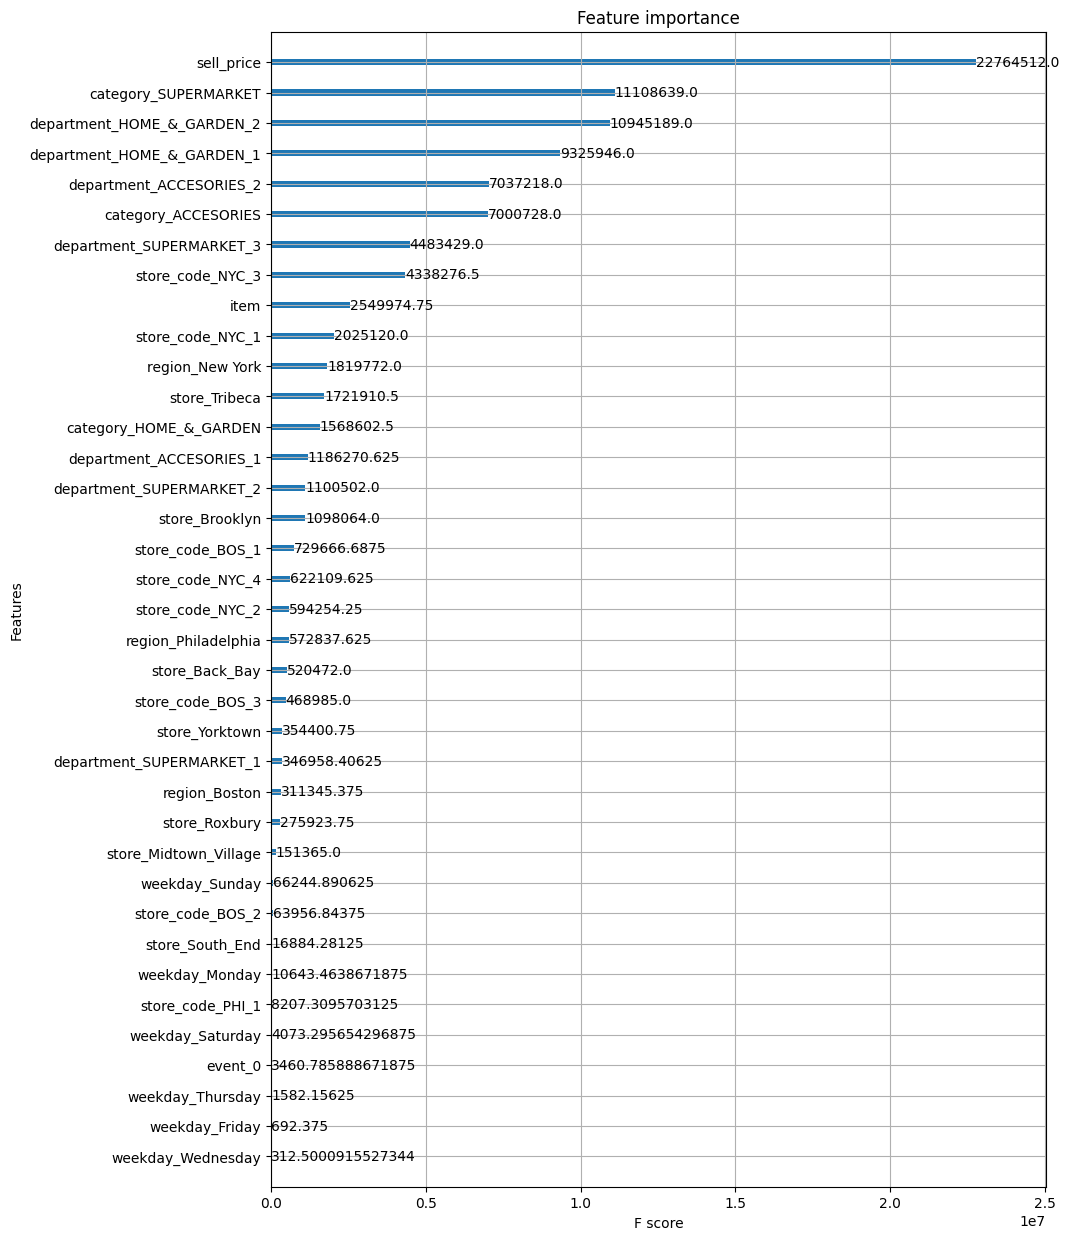

In [ ]:
importance = model.get_booster().get_score(importance_type = "gain")
importance = {k: v for k, v in sorted(importance.items(), key = lambda item: item[1])}

fig, ax = plt.subplots(figsize = (10, 15))
xgb.plot_importance(model, importance_type = "gain", ax = ax)

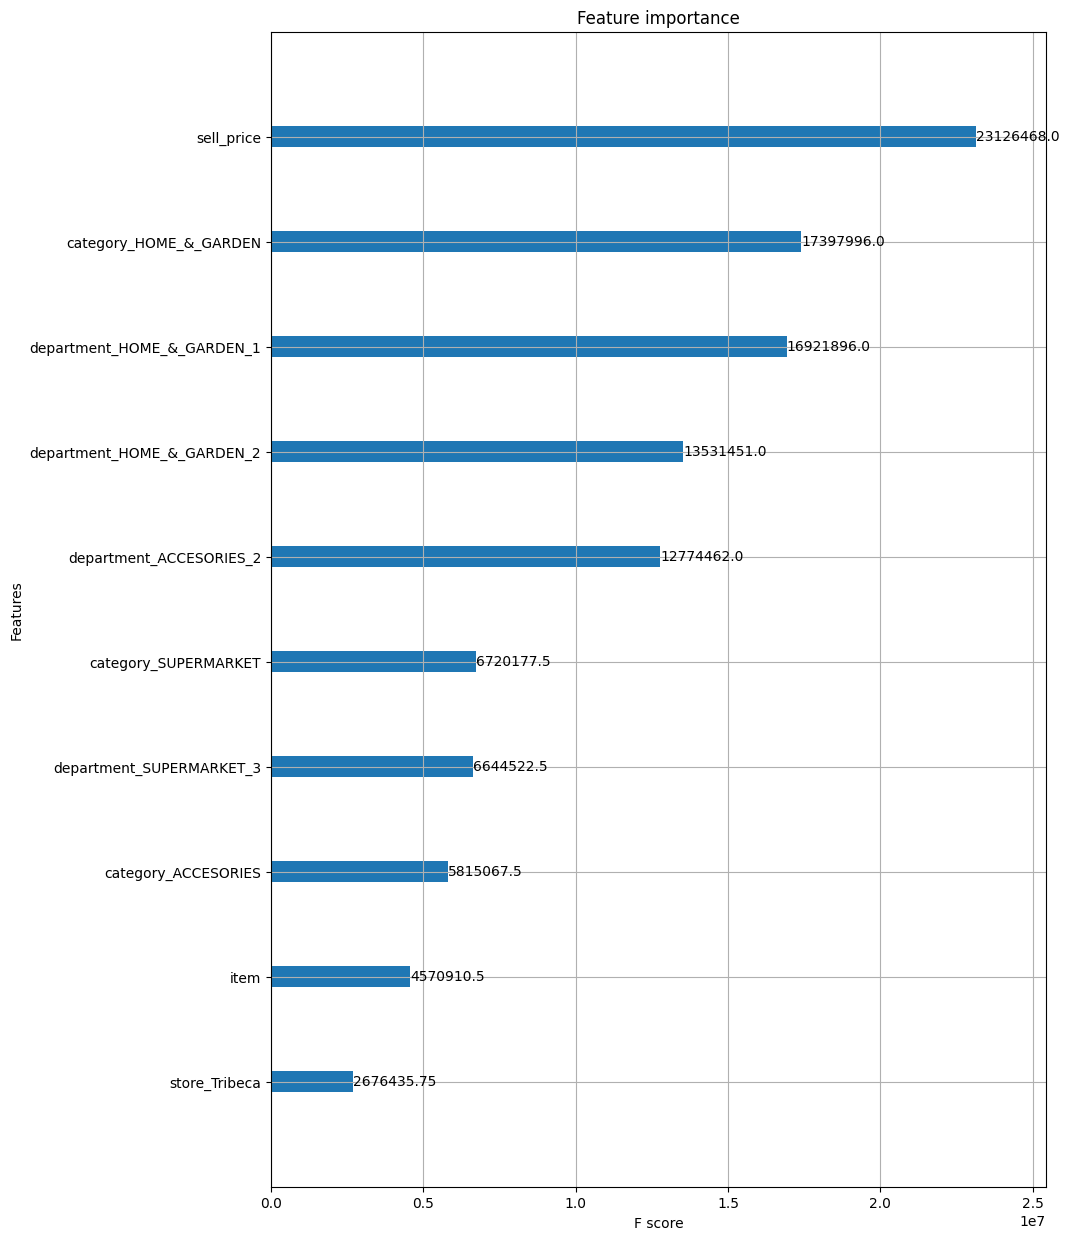

In [ ]:
importance = model.get_booster().get_score(importance_type = "gain")

# Convert the dictionary to a pandas DataFrame and sort by importance
importance_df = pd.DataFrame.from_dict(importance, orient='index', columns=['importance'])
importance_df = importance_df.sort_values(by=['importance'], ascending=False)

# Save the top 10 feature importances to a CSV file
top_n = 10
importance_df.iloc[:top_n].to_csv('feature_importances.csv')

# Plot the feature importances
fig, ax = plt.subplots(figsize=(10, 15))
xgb.plot_importance(model, importance_type="gain", ax=ax, max_num_features=top_n)
plt.show()



In [ ]:
files.download('feature_importances.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
kfold = KFold(n_splits =10, shuffle =True)

List_scores= []

for train_idx, val_idx in kfold.split(X_train, y_train):
    # Split the data into training and test sets for this fold
    X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]
    model = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,early_stopping_rounds = 20,
                max_depth = 5, alpha = 10, n_estimators = 10)
    model.fit(X_train_fold, y_train_fold, eval_set=[(X_val_fold, y_val_fold)])
    
    # Make predictions on the test set
   # Make predictions on the test set
    y_pred = model.predict(X_val_fold)

    # Calculate the RMSE score for this fold and append it to the list
    rmse = np.sqrt(np.mean((y_val_fold - y_pred)**2))
    List_scores.append(rmse) 

    # Print the average RMSE score across all folds
    print('Average RMSE score: {:.2f}'.format(np.mean(List_scores)))


[0]	validation_0-rmse:32.99497
[1]	validation_0-rmse:31.51843
[2]	validation_0-rmse:30.26933
[3]	validation_0-rmse:29.58045
[4]	validation_0-rmse:28.97744
[5]	validation_0-rmse:28.51664
[6]	validation_0-rmse:28.13071
[7]	validation_0-rmse:27.46524
[8]	validation_0-rmse:27.18156
[9]	validation_0-rmse:26.95852
Average RMSE score: 26.96
[0]	validation_0-rmse:32.98370
[1]	validation_0-rmse:31.50604
[2]	validation_0-rmse:30.25701
[3]	validation_0-rmse:29.56591
[4]	validation_0-rmse:28.96181
[5]	validation_0-rmse:28.49884
[6]	validation_0-rmse:28.11093
[7]	validation_0-rmse:27.44312
[8]	validation_0-rmse:27.15829
[9]	validation_0-rmse:26.93403
Average RMSE score: 26.95
[0]	validation_0-rmse:32.84292
[1]	validation_0-rmse:31.37086
[2]	validation_0-rmse:30.12639
[3]	validation_0-rmse:29.43520
[4]	validation_0-rmse:28.82866
[5]	validation_0-rmse:28.36422
[6]	validation_0-rmse:27.97484
[7]	validation_0-rmse:27.31643
[8]	validation_0-rmse:27.03027
[9]	validation_0-rmse:26.80549
Average RMSE score

In [ ]:
Y_valida_pred = pd.DataFrame(model.predict(X_val), index= y_val.index, columns = ['predicted_sales'])

rmse_valida = np.sqrt(mean_squared_error(y_val, Y_valida_pred))
rmse_valida

30.287340081967333

In [ ]:
Y_valida_pred


,predicted_sales
id,
ACCESORIES_1_001_BOS_3,9.015162
ACCESORIES_1_002_BOS_3,9.309230
ACCESORIES_1_003_BOS_3,9.814273
ACCESORIES_1_004_BOS_3,9.309230
ACCESORIES_1_005_BOS_3,9.814273
...,...
SUPERMARKET_3_823_PHI_2,17.600235
SUPERMARKET_3_824_PHI_2,17.600235
SUPERMARKET_3_825_PHI_2,17.600235


In [ ]:
Y_valida_pred['predicted_sales'] = Y_valida_pred['predicted_sales'].astype(int)

In [ ]:
results = y_val.to_frame().join(Y_valida_pred)
results

,monthly_sales,predicted_sales
id,,
ACCESORIES_1_001_BOS_3,13,9
ACCESORIES_1_002_BOS_3,4,9
ACCESORIES_1_003_BOS_3,7,9
ACCESORIES_1_004_BOS_3,13,9
ACCESORIES_1_005_BOS_3,16,9
...,...,...
SUPERMARKET_3_823_PHI_2,5,17
SUPERMARKET_3_824_PHI_2,1,17
SUPERMARKET_3_825_PHI_2,40,17


In [ ]:
results['predicted_sales'].value_counts()

15    2531
14    2353
9     2235
16    2174
17    2155
8     2051
12    1826
13    1797
6     1768
19    1716
7     1585
18    1578
10    1057
11     988
20     866
22     494
24     466
23     377
21     363
5      233
25     166
26      65
28      37
27      25
Name: predicted_sales, dtype: int64

<Axes: xlabel='predicted_sales', ylabel='Density'>

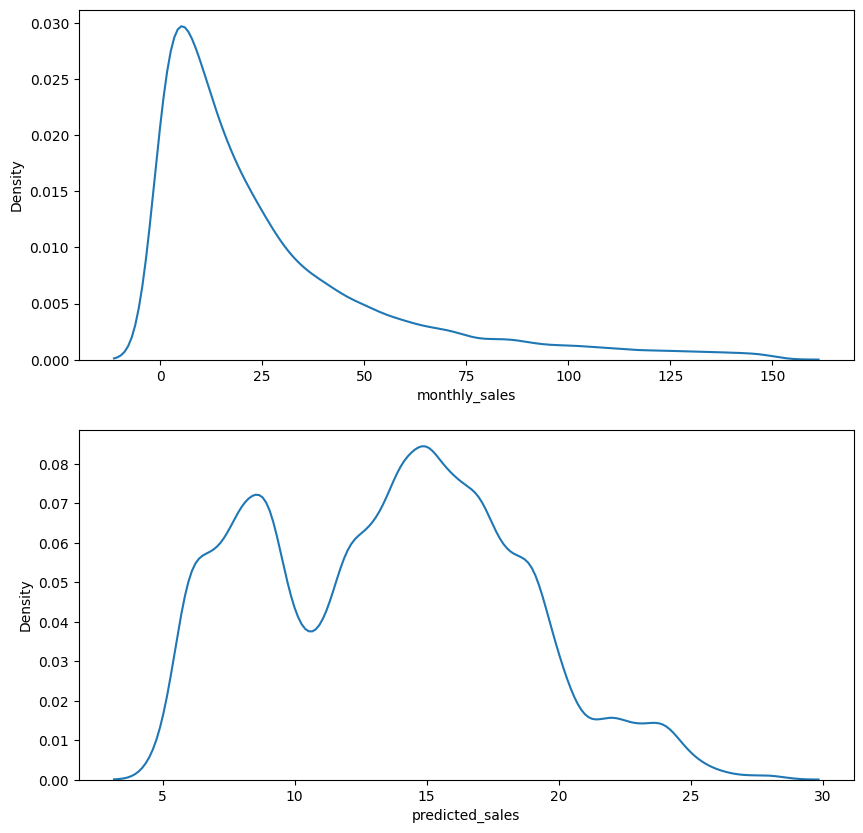

In [ ]:
fig = plt.figure(figsize=(10,10))
ax1, ax2 = fig.subplots(2, 1)
sns.kdeplot(results['monthly_sales'], ax = ax1)
sns.kdeplot(results['predicted_sales'], ax = ax2)

In [ ]:
Y_test_pred = pd.DataFrame(model.predict(X_test), index= y_test.index, columns = ['predicted_sales'])
Y_test_pred

,predicted_sales
id,
ACCESORIES_1_001_BOS_3,9.015162
ACCESORIES_1_002_BOS_3,9.309230
ACCESORIES_1_003_BOS_3,9.814273
ACCESORIES_1_004_BOS_3,9.309230
ACCESORIES_1_005_BOS_3,9.814273
...,...
SUPERMARKET_3_823_PHI_2,17.600235
SUPERMARKET_3_824_PHI_2,17.600235
SUPERMARKET_3_825_PHI_2,17.600235


In [ ]:
Y_test_pred['predicted_sales'] = round(Y_test_pred['predicted_sales'],2)

In [ ]:
y_test

id
ACCESORIES_1_001_BOS_3      8
ACCESORIES_1_002_BOS_3      3
ACCESORIES_1_003_BOS_3      7
ACCESORIES_1_004_BOS_3     23
ACCESORIES_1_005_BOS_3     14
                           ..
SUPERMARKET_3_823_PHI_2     2
SUPERMARKET_3_824_PHI_2    17
SUPERMARKET_3_825_PHI_2    53
SUPERMARKET_3_826_PHI_2    32
SUPERMARKET_3_827_PHI_2    66
Name: monthly_sales, Length: 29345, dtype: int64

In [ ]:
results_1 = y_test.to_frame().join(Y_test_pred)

results_1.reset_index(inplace=True)


In [ ]:
results_1

,id,monthly_sales,predicted_sales
0,ACCESORIES_1_001_BOS_3,8,9.020000
1,ACCESORIES_1_002_BOS_3,3,9.310000
2,ACCESORIES_1_003_BOS_3,7,9.810000
3,ACCESORIES_1_004_BOS_3,23,9.310000
4,ACCESORIES_1_005_BOS_3,14,9.810000
...,...,...,...
29340,SUPERMARKET_3_823_PHI_2,2,17.600000
29341,SUPERMARKET_3_824_PHI_2,17,17.600000
29342,SUPERMARKET_3_825_PHI_2,53,17.600000
29343,SUPERMARKET_3_826_PHI_2,32,20.450001


In [ ]:
df_merge = df_item_sales[['id', 'category','item','department', 'store', 'region']]

In [ ]:
 prediction_analysis = pd.merge(df_merge, results_1, how= 'left', on='id')
 prediction_analysis

,id,category,item,department,store,region,monthly_sales,predicted_sales
0,ACCESORIES_1_001_NYC_1,ACCESORIES,ACCESORIES_1_001,ACCESORIES_1,Greenwich_Village,New York,26.0,10.170000
1,ACCESORIES_1_002_NYC_1,ACCESORIES,ACCESORIES_1_002,ACCESORIES_1,Greenwich_Village,New York,1.0,10.460000
2,ACCESORIES_1_003_NYC_1,ACCESORIES,ACCESORIES_1_003,ACCESORIES_1,Greenwich_Village,New York,16.0,10.970000
3,ACCESORIES_1_004_NYC_1,ACCESORIES,ACCESORIES_1_004,ACCESORIES_1,Greenwich_Village,New York,51.0,10.460000
4,ACCESORIES_1_005_NYC_1,ACCESORIES,ACCESORIES_1_005,ACCESORIES_1,Greenwich_Village,New York,29.0,10.970000
...,...,...,...,...,...,...,...,...
30485,SUPERMARKET_3_823_PHI_3,SUPERMARKET,SUPERMARKET_3_823,SUPERMARKET_3,Queen_Village,Philadelphia,6.0,17.610001
30486,SUPERMARKET_3_824_PHI_3,SUPERMARKET,SUPERMARKET_3_824,SUPERMARKET_3,Queen_Village,Philadelphia,9.0,17.610001
30487,SUPERMARKET_3_825_PHI_3,SUPERMARKET,SUPERMARKET_3_825,SUPERMARKET_3,Queen_Village,Philadelphia,24.0,17.610001
30488,SUPERMARKET_3_826_PHI_3,SUPERMARKET,SUPERMARKET_3_826,SUPERMARKET_3,Queen_Village,Philadelphia,23.0,20.459999


In [ ]:
prediction_analysis['predicted_sales'].sum()

416519.62

In [ ]:
prediction_analysis.groupby('region')['monthly_sales'].sum()

region
Boston          183761.0
New York        305704.0
Philadelphia    208671.0
Name: monthly_sales, dtype: float64

In [ ]:
prediction_analysis.groupby('region')['predicted_sales'].sum()

region
Boston          120791.382812
New York        176330.437500
Philadelphia    119397.828125
Name: predicted_sales, dtype: float32

In [ ]:
prediction_analysis.groupby('category')['predicted_sales'].sum()

category
ACCESORIES        58608.160156
HOME_&_GARDEN    117695.078125
SUPERMARKET      240216.406250
Name: predicted_sales, dtype: float32

In [ ]:
prediction_analysis.groupby('store')['predicted_sales'].sum()

store
Back_Bay             39740.468750
Brooklyn             39517.398438
Greenwich_Village    43954.320312
Harlem               42586.710938
Midtown_Village      41198.441406
Queen_Village        40326.171875
Roxbury              41647.589844
South_End            39403.320312
Tribeca              50272.000000
Yorktown             37873.218750
Name: predicted_sales, dtype: float32

In [ ]:
prediction_analysis.groupby('item')['predicted_sales'].sum()

item
ACCESORIES_1_001      94.919998
ACCESORIES_1_002      98.059998
ACCESORIES_1_003     103.309998
ACCESORIES_1_004      85.650002
ACCESORIES_1_005     103.309998
                        ...    
SUPERMARKET_3_823    182.559998
SUPERMARKET_3_824    182.559998
SUPERMARKET_3_825    182.559998
SUPERMARKET_3_826    209.960007
SUPERMARKET_3_827    254.169998
Name: predicted_sales, Length: 3049, dtype: float32

In [ ]:
 prediction_analysis.to_csv('prediction_analysis.csv')
 files.download('prediction_analysis.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
prediction_analysis[prediction_analysis['predicted_sales']<0]

,id,item,department,store,region,monthly_sales,predicted_sales


In [ ]:
results_1['monthly_sales'].sum()

698136

In [ ]:
results_1['predicted_sales'].sum()

416519.66